In [1]:
import os
import matplotlib.pyplot as plt
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns

## 0. 데이터 결측치 확인

In [3]:
df = pd.read_csv('Train.csv', index_col=['ID'])
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


## 1. Target(Reached.on.Time_Y.N) 기준 분포 확인

### 1) Reached.on.Time_Y.N

In [5]:
df['Reached.on.Time_Y.N'].replace({1:'정시미도착', 0:'정시도착'}, inplace=True)
df.rename(columns={'Reached.on.Time_Y.N':'정시_도착_여부'}, inplace=True)
df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,정시_도착_여부
ID,,,,,,,,,,,
10995,A,Ship,4,1,252,5,medium,F,1,1538,정시미도착
10996,B,Ship,4,1,232,5,medium,F,6,1247,정시도착
10997,C,Ship,5,4,242,5,low,F,4,1155,정시도착
10998,F,Ship,5,2,223,6,medium,M,2,1210,정시도착
10999,D,Ship,2,5,155,5,low,F,6,1639,정시도착


(-1.25, 1.25, -1.25, 1.25)

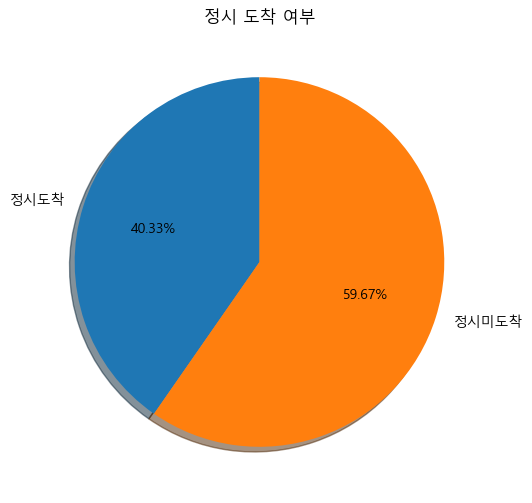

In [6]:
plt.figure(figsize=(10, 6))
plt.title('정시 도착 여부')
df['정시_도착_여부'].sort_values().value_counts(sort=False).plot.pie(autopct='%.2f%%', shadow=True, startangle=90)
plt.axis('off')

### 2) Warehouse block

<Axes: xlabel='Warehouse_block', ylabel='count'>

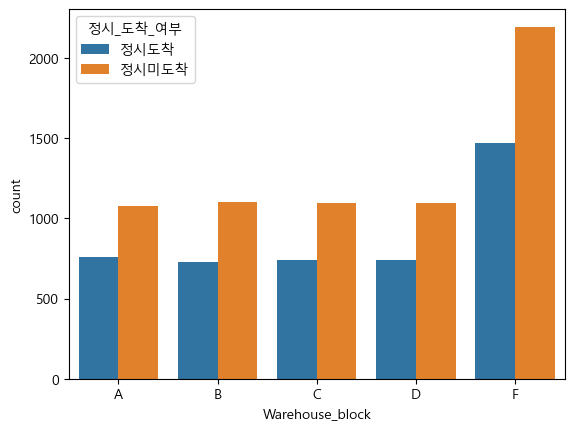

In [7]:
sns.countplot(data=df.sort_values('Warehouse_block'), x='Warehouse_block', hue='정시_도착_여부')

### 3) Mode of shipment

In [8]:
df['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

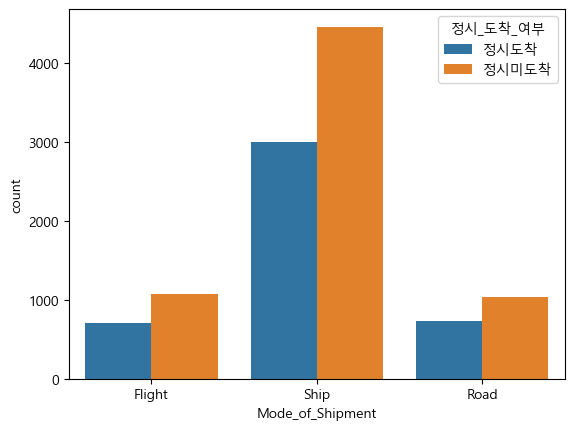

In [9]:
hue_order = ['정시도착', '정시미도착']
sns.countplot(data=df, x='Mode_of_Shipment', hue='정시_도착_여부', hue_order=hue_order)

### 4) Customer care calls

<Axes: xlabel='Customer_care_calls', ylabel='count'>

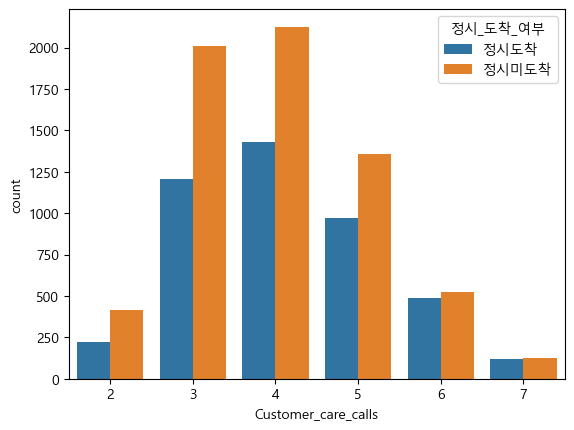

In [10]:
sns.countplot(data=df, x='Customer_care_calls', hue='정시_도착_여부', hue_order=hue_order)

### 5) Customer rating

[(0.0, 1700.0)]

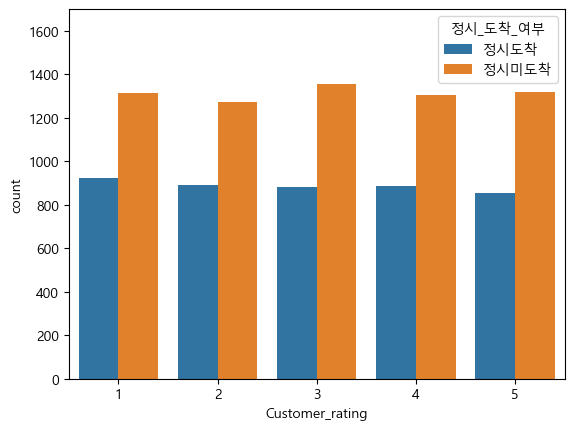

In [11]:
sns.countplot(data=df, x='Customer_rating', hue='정시_도착_여부', hue_order=hue_order).set(ylim=(0, 1700))

### 6) Cost of the product

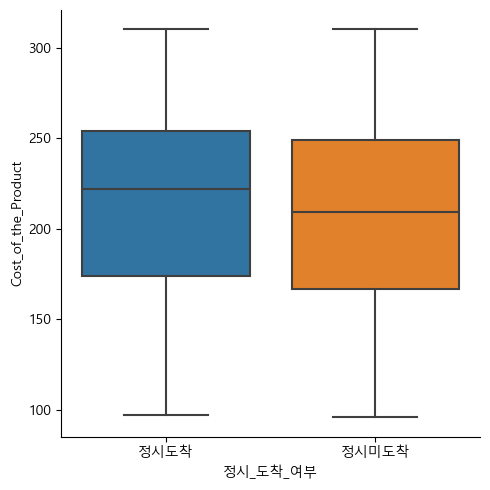

In [12]:
sns.catplot(data=df, y='Cost_of_the_Product', x='정시_도착_여부', kind='box', order=hue_order)

### 7) Prior purchases

<Axes: xlabel='Prior_purchases', ylabel='count'>

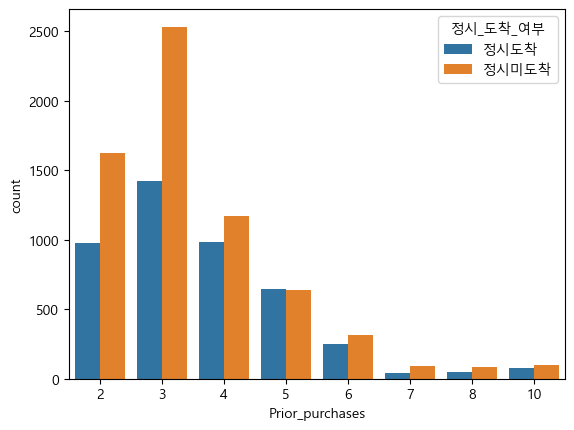

In [13]:
sns.countplot(data=df, x='Prior_purchases', hue='정시_도착_여부', hue_order=hue_order)

### 8) Product importance

<Axes: xlabel='Product_importance', ylabel='count'>

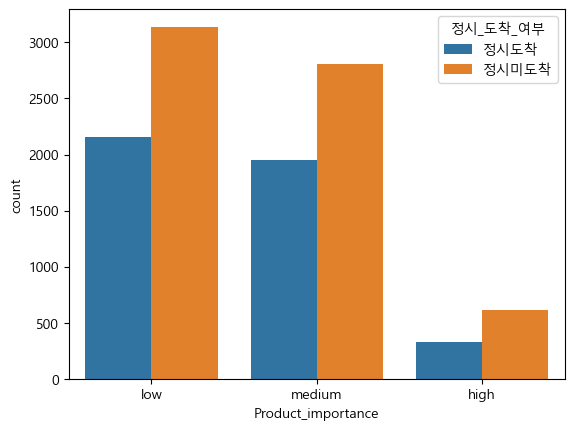

In [14]:
sns.countplot(data=df, x='Product_importance', hue='정시_도착_여부', hue_order=hue_order)

### 9) Gender

[(0.0, 4500.0)]

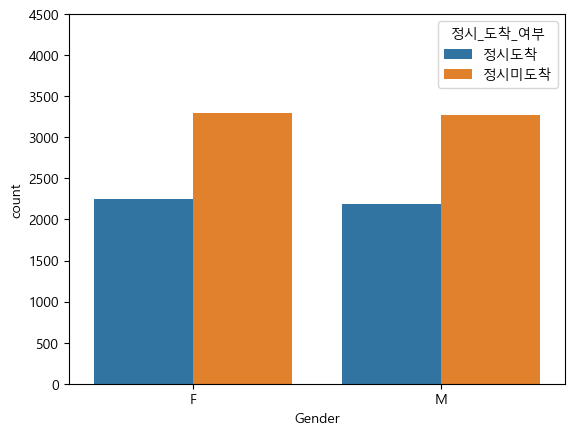

In [15]:
sns.countplot(data=df, x='Gender', hue='정시_도착_여부', hue_order=hue_order).set(ylim=(0, 4500))

### 10) Discount offered

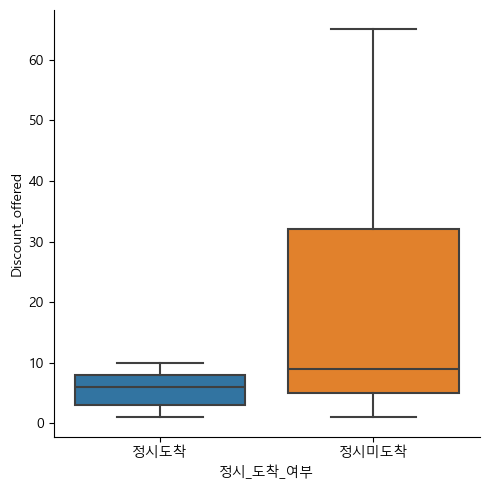

In [16]:
sns.catplot(data=df, y='Discount_offered', x='정시_도착_여부', kind='box', order=hue_order)

### 11) Weight in gms

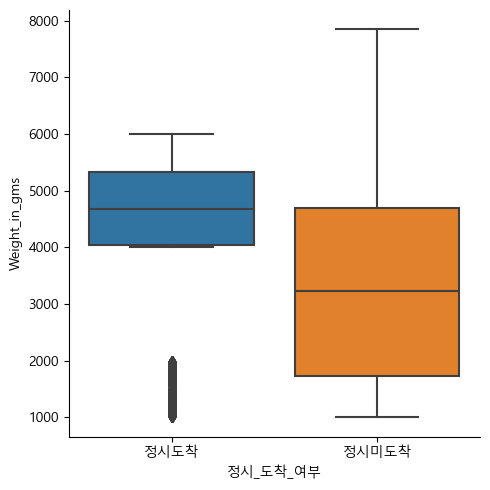

In [17]:
sns.catplot(data=df, y='Weight_in_gms', x='정시_도착_여부', kind='box', order=hue_order)

<Axes: xlabel='정시_도착_여부', ylabel='Weight_in_gms'>

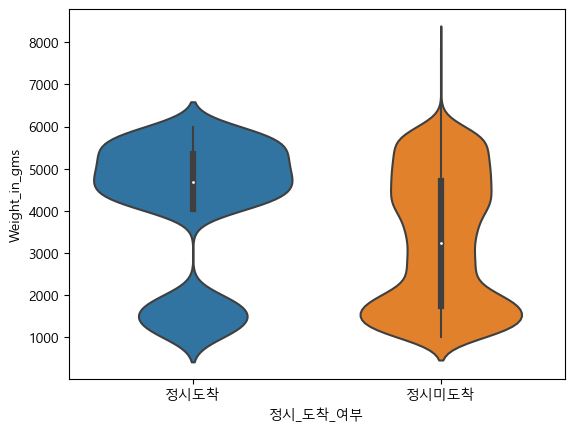

In [18]:
sns.violinplot(data=df, y='Weight_in_gms', x='정시_도착_여부', kind='box', order=hue_order)

## 2. 전체 분포 특이값 비율 확인

### 1) Warehouse block

In [19]:
warehouse_group = df.groupby('Warehouse_block')
warehouse_group.groups

{'A': [3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63, 69, 75, 81, 87, 93, 99, 105, 111, 117, 123, 129, 135, 141, 147, 153, 159, 165, 171, 177, 183, 189, 195, 201, 207, 213, 219, 225, 231, 237, 243, 249, 255, 261, 267, 273, 279, 285, 291, 297, 303, 309, 315, 321, 327, 333, 339, 345, 351, 357, 363, 369, 375, 381, 387, 393, 399, 405, 411, 417, 423, 429, 435, 441, 447, 453, 459, 465, 471, 477, 483, 489, 495, 501, 507, 513, 519, 525, 531, 537, 543, 549, 555, 561, 567, 573, 579, 585, 591, 597, ...], 'B': [4, 10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 76, 82, 88, 94, 100, 106, 112, 118, 124, 130, 136, 142, 148, 154, 160, 166, 172, 178, 184, 190, 196, 202, 208, 214, 220, 226, 232, 238, 244, 250, 256, 262, 268, 274, 280, 286, 292, 298, 304, 310, 316, 322, 328, 334, 340, 346, 352, 358, 364, 370, 376, 382, 388, 394, 400, 406, 412, 418, 424, 430, 436, 442, 448, 454, 460, 466, 472, 478, 484, 490, 496, 502, 508, 514, 520, 526, 532, 538, 544, 550, 556, 562, 568, 574, 580, 586, 592, 598, ...], 'C': [5, 11

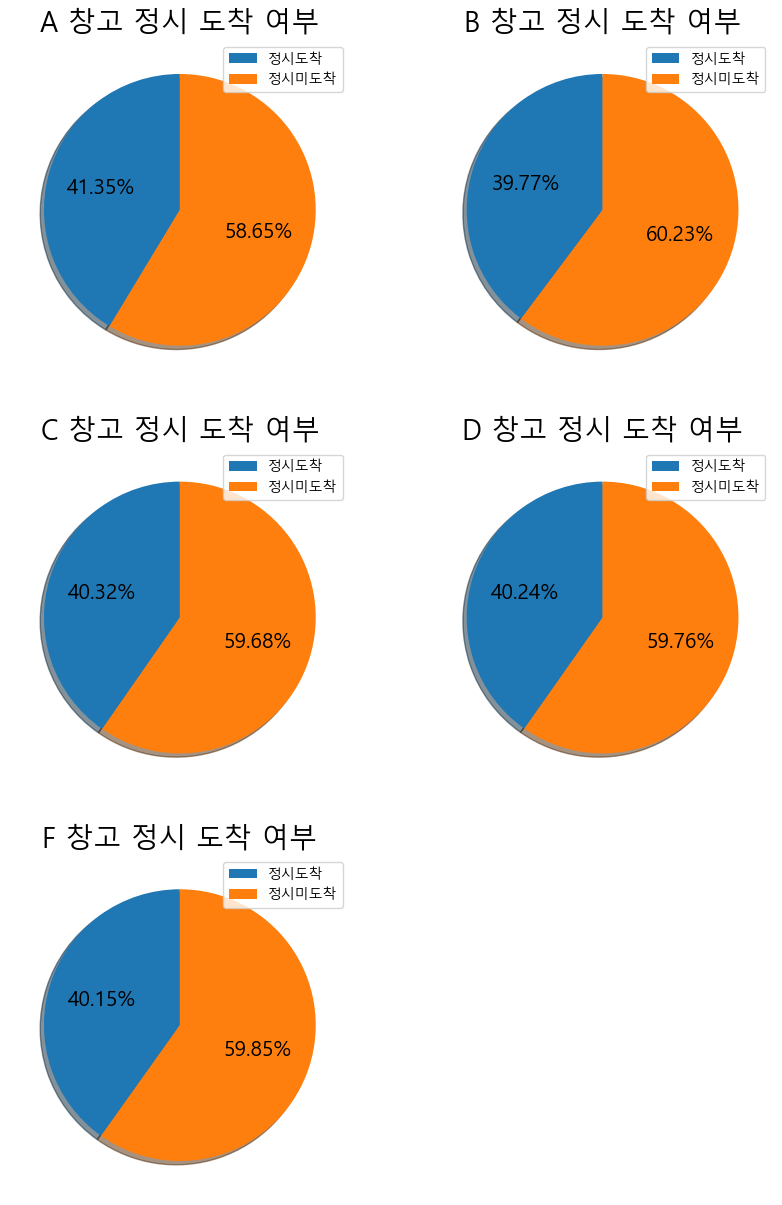

In [20]:
values = ['A', 'B', 'C', 'D', 'F']
axes = {}

fig = plt.figure(figsize=(10, 15))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(3, 2, n+1)
    axes[f'ax{n+1}'] = warehouse_group.get_group(val)['정시_도착_여부'].sort_values().value_counts(sort=False).plot.pie(
        autopct='%.2f%%', shadow=True, startangle=90, textprops={'size':15}, labels=None
    )
    axes[f'ax{n+1}'].set_title(f'{val} 창고 정시 도착 여부', size=20)
    plt.axis('off')
    plt.legend(hue_order)

plt.show()

### 2) Mode of shipment

In [21]:
shipment_group = df.groupby('Mode_of_Shipment')
shipment_group.groups

{'Flight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, ...], 'Road': [111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670,

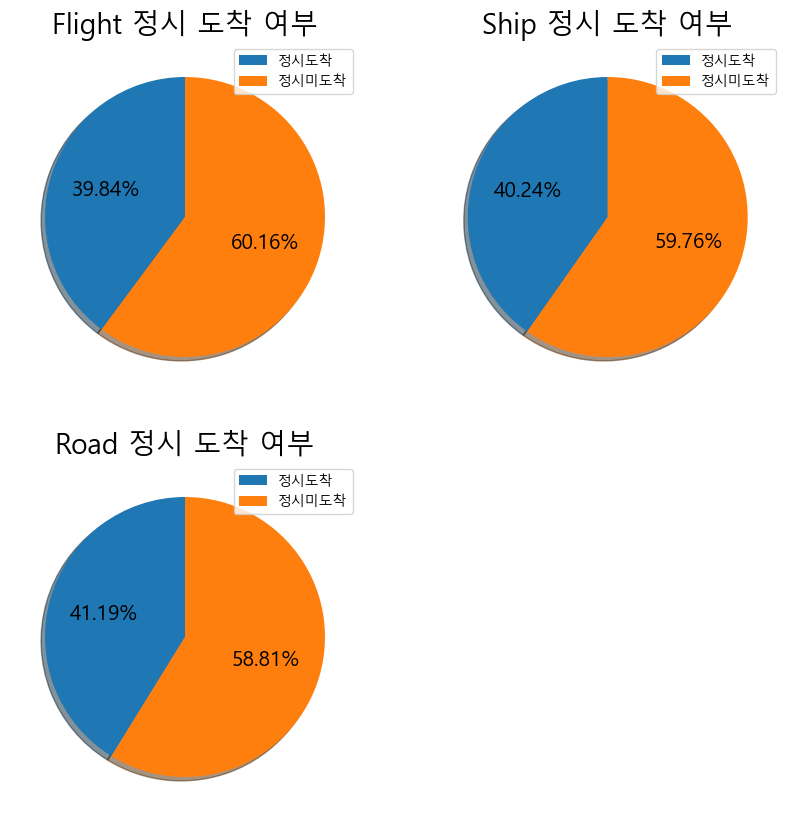

In [22]:
values = ['Flight', 'Ship', 'Road']
axes = {}

fig = plt.figure(figsize=(10, 10))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 2, n+1)
    axes[f'ax{n+1}'] = shipment_group.get_group(val)['정시_도착_여부'].sort_values().value_counts(sort=False).plot.pie(
        autopct='%.2f%%', shadow=True, startangle=90, textprops={'size':15}, labels=None
    )
    axes[f'ax{n+1}'].set_title(f'{val} 정시 도착 여부', size=20)
    plt.axis('off')
    plt.legend(hue_order)

plt.show()

### 3) Customer care calls

In [23]:
calls_group = df.groupby('Customer_care_calls')
calls_group.groups

{2: [3, 5, 23, 29, 38, 54, 56, 77, 82, 96, 103, 119, 144, 145, 146, 161, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 267, 274, 286, 341, 344, 353, 358, 377, 386, 398, 406, 410, 415, 429, 452, 473, 491, 532, 537, 549, 554, 558, 562, 571, 580, 583, 621, 634, 656, 706, ...], 3: [4, 6, 7, 9, 10, 11, 13, 17, 21, 22, 26, 31, 33, 37, 43, 44, 45, 47, 57, 58, 61, 62, 64, 66, 67, 68, 70, 78, 79, 80, 81, 86, 89, 94, 97, 99, 105, 107, 111, 114, 115, 116, 122, 124, 126, 128, 131, 132, 135, 136, 137, 138, 147, 149, 153, 154, 155, 158, 160, 162, 165, 166, 173, 174, 175, 179, 183, 184, 185, 186, 219, 220, 221, 225, 229, 230, 231, 232, 263, 264, 269, 271, 275, 280, 281, 283, 294, 296, 303, 305, 307, 308, 311, 312, 313, 319, 321, 323, 324, 326, ...], 4: [1, 2, 8, 12, 14, 15, 16, 20

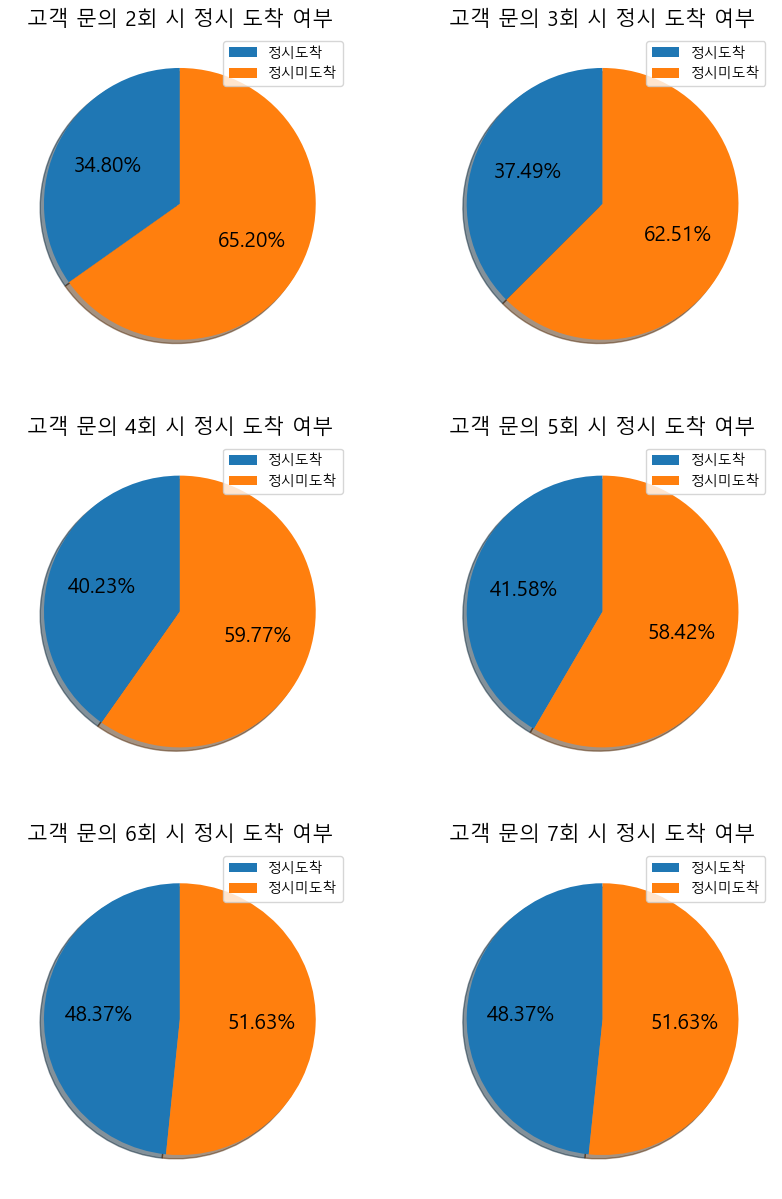

In [24]:
values = [2, 3, 4, 5, 6, 7]
axes = {}

fig = plt.figure(figsize=(10, 15))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(3, 2, n+1)
    axes[f'ax{n+1}'] = calls_group.get_group(val)['정시_도착_여부'].sort_values().value_counts(sort=False).plot.pie(
        autopct='%.2f%%', shadow=True, startangle=90, textprops={'size':15}, labels=None
    )
    axes[f'ax{n+1}'].set_title(f'고객 문의 {val}회 시 정시 도착 여부', size=15)
    plt.axis('off')
    plt.legend(hue_order)

plt.show()

### 4) Product importance

In [25]:
importance_group = df.groupby('Product_importance')
importance_group.groups

{'high': [14, 19, 24, 27, 37, 55, 59, 60, 65, 71, 83, 84, 91, 95, 108, 109, 115, 116, 117, 141, 159, 167, 172, 177, 183, 204, 210, 218, 223, 229, 250, 256, 265, 295, 307, 309, 317, 332, 342, 354, 364, 367, 385, 400, 402, 436, 441, 442, 457, 478, 516, 530, 531, 537, 539, 547, 557, 562, 587, 595, 608, 609, 615, 617, 626, 628, 646, 648, 654, 667, 673, 680, 684, 685, 688, 692, 700, 706, 712, 716, 717, 720, 724, 732, 738, 786, 814, 815, 825, 831, 849, 857, 865, 866, 872, 889, 890, 891, 893, 908, ...], 'low': [1, 2, 3, 7, 8, 9, 15, 16, 23, 26, 29, 30, 32, 33, 39, 40, 41, 44, 45, 46, 48, 50, 51, 52, 53, 54, 56, 57, 61, 66, 68, 72, 75, 76, 78, 79, 82, 87, 89, 92, 96, 102, 103, 104, 105, 107, 111, 112, 113, 114, 119, 120, 121, 123, 125, 126, 128, 131, 132, 133, 139, 140, 142, 143, 146, 147, 149, 150, 153, 154, 156, 157, 160, 163, 165, 168, 169, 173, 174, 175, 182, 185, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 201, 202, 203, 205, 207, 208, 209, 211, ...], 'medium': [4, 5, 6, 10, 11, 12,

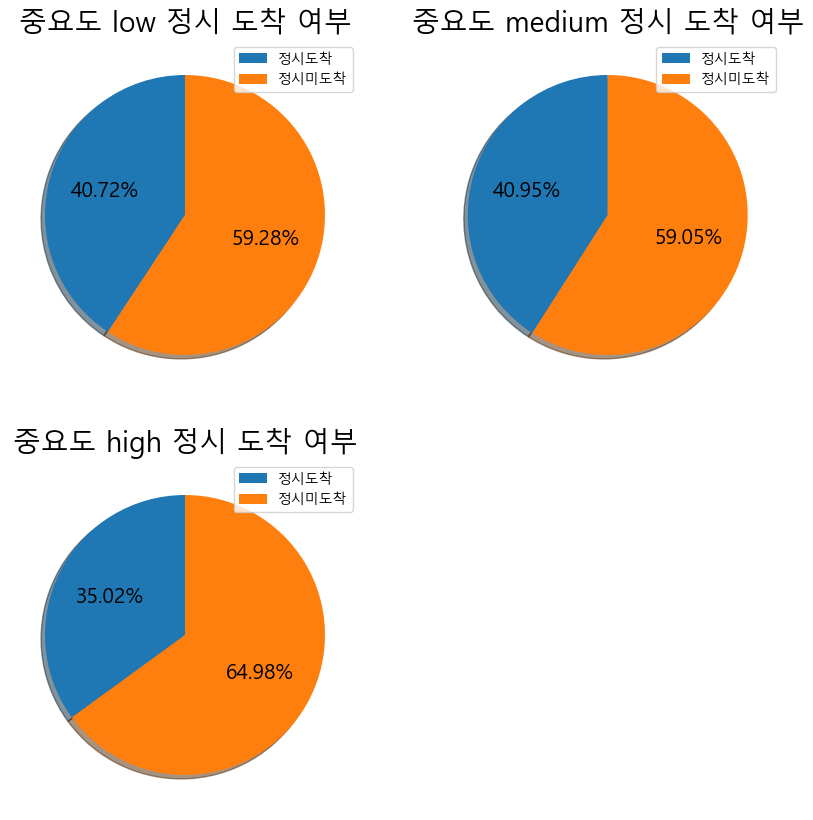

In [26]:
values = ['low', 'medium', 'high']
axes = {}

fig = plt.figure(figsize=(10, 10))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 2, n+1)
    axes[f'ax{n+1}'] = importance_group.get_group(val)['정시_도착_여부'].sort_values().value_counts(sort=False).plot.pie(
        autopct='%.2f%%', shadow=True, startangle=90, textprops={'size':15}, labels=None
    )
    axes[f'ax{n+1}'].set_title(f'중요도 {val} 정시 도착 여부', size=20)
    plt.axis('off')
    plt.legend(hue_order)

plt.show()

### 5) Discount offered

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


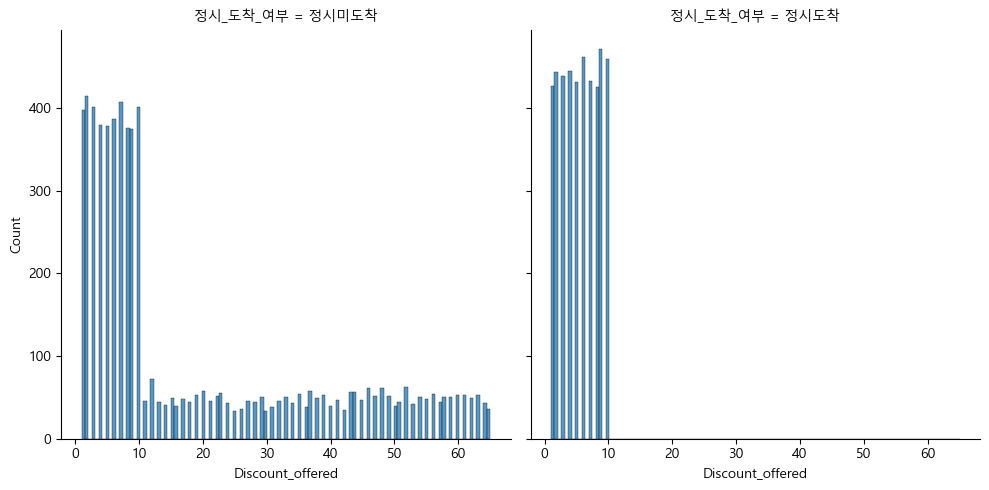

In [27]:
sns.displot(df, x='Discount_offered', col='정시_도착_여부')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


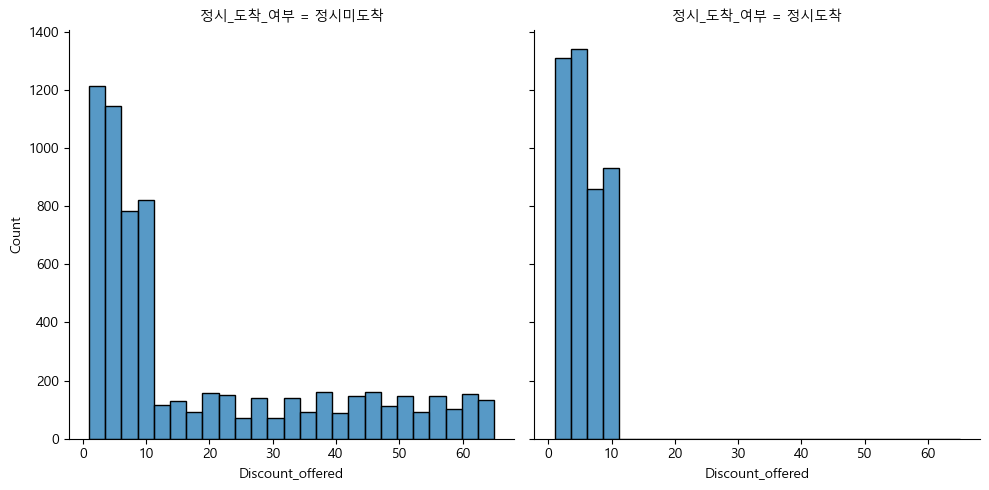

In [28]:
sns.displot(df, x='Discount_offered', col='정시_도착_여부', bins=25)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

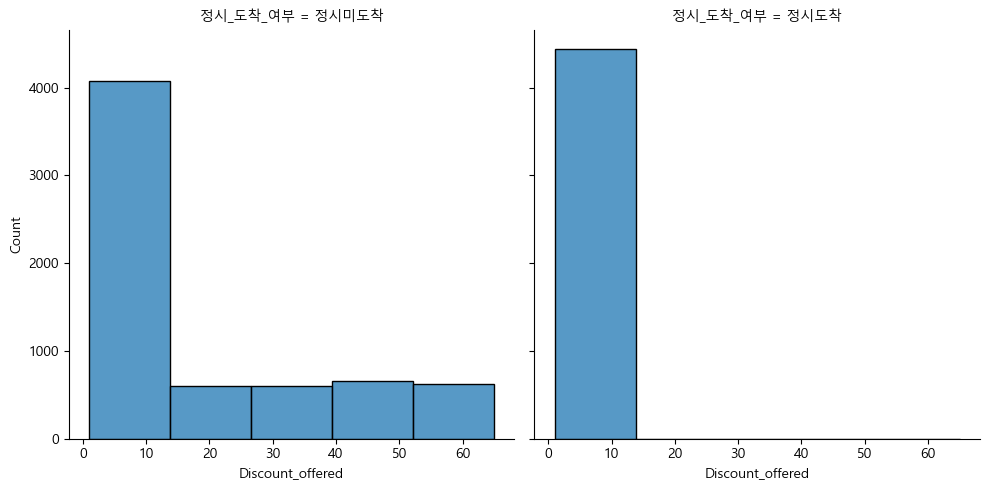

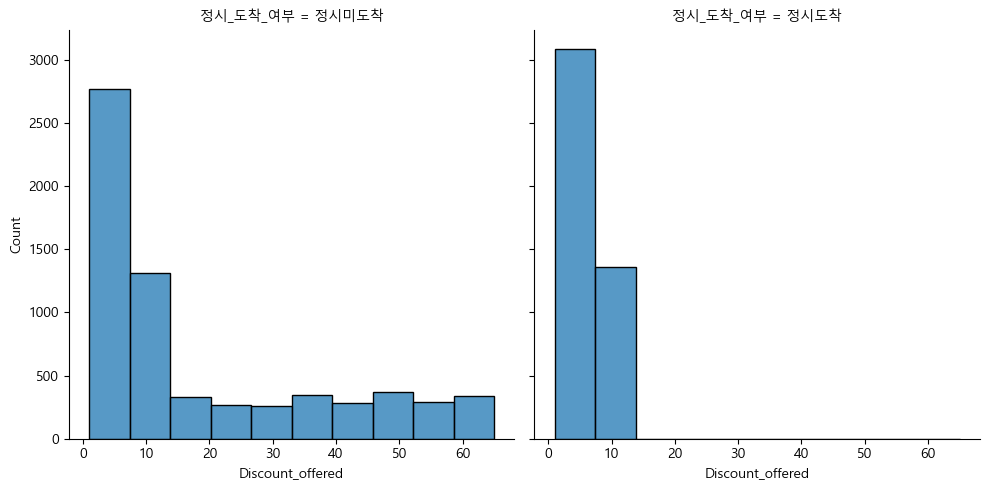

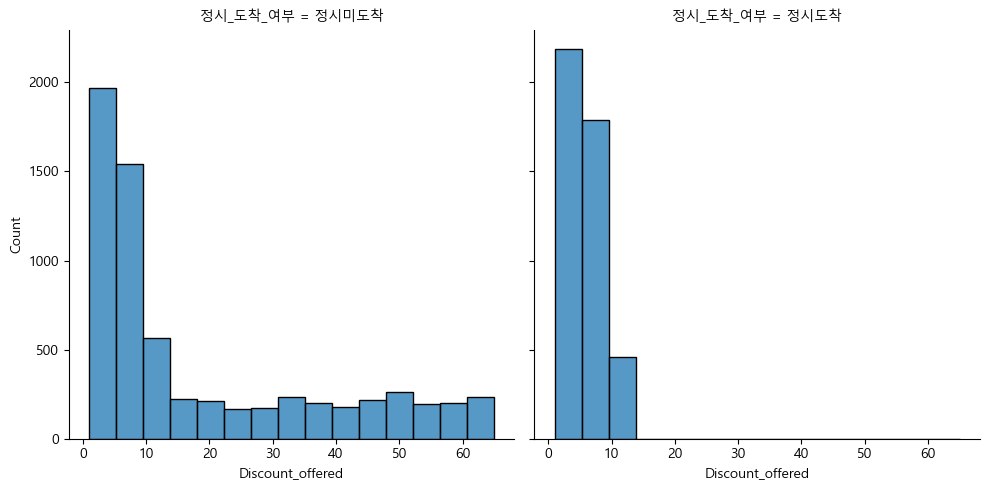

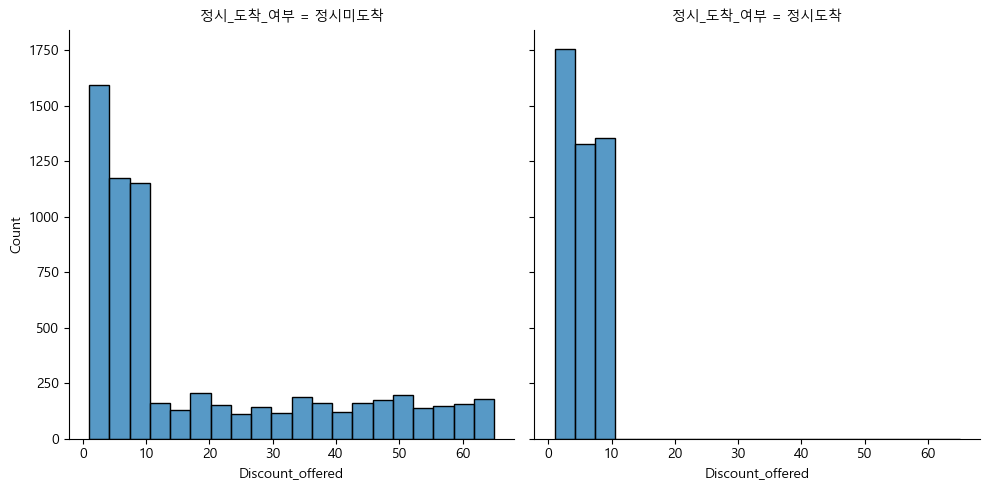

In [29]:
values = [5, 10, 15, 20]

for n, val in enumerate(values):
    sns.displot(df, x='Discount_offered', col='정시_도착_여부', bins=val)

In [30]:
# 196, 28
df[df['Discount_offered']==35].head(1)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,정시_도착_여부
ID,,,,,,,,,,,
95,C,Ship,4,1,213,4,high,F,35,2343,정시미도착


In [31]:
df.loc[95]

Warehouse_block            C
Mode_of_Shipment        Ship
Customer_care_calls        4
Customer_rating            1
Cost_of_the_Product      213
Prior_purchases            4
Product_importance      high
Gender                     F
Discount_offered          35
Weight_in_gms           2343
정시_도착_여부               정시미도착
Name: 95, dtype: object

In [32]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', 
          '56-60', '60 +']

df_15 = df.copy()

df_15['Discount_offered'] = pd.cut(df_15['Discount_offered'], bins=bins, labels=labels, right=True)
df_15.loc[95]

Warehouse_block            C
Mode_of_Shipment        Ship
Customer_care_calls        4
Customer_rating            1
Cost_of_the_Product      213
Prior_purchases            4
Product_importance      high
Gender                     F
Discount_offered       31-35
Weight_in_gms           2343
정시_도착_여부               정시미도착
Name: 95, dtype: object

In [33]:
ontime_group = df_15.groupby('정시_도착_여부')
ontime_group.groups

{'정시도착': [3136, 3137, 3138, 3139, 3141, 3144, 3145, 3146, 3147, 3148, 3150, 3151, 3153, 3154, 3158, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3170, 3173, 3174, 3178, 3179, 3180, 3182, 3184, 3186, 3187, 3188, 3189, 3191, 3192, 3193, 3195, 3197, 3198, 3199, 3200, 3201, 3202, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3215, 3216, 3220, 3223, 3224, 3225, 3228, 3230, 3232, 3234, 3238, 3245, 3248, 3251, 3254, 3255, 3257, 3258, 3263, 3265, 3267, 3270, 3271, 3272, 3274, 3279, 3280, 3282, 3283, 3284, 3286, 3287, 3288, 3290, 3292, 3293, 3294, 3300, 3301, 3303, 3304, 3305, 3306, 3307, 3308, 3309, ...], '정시미도착': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


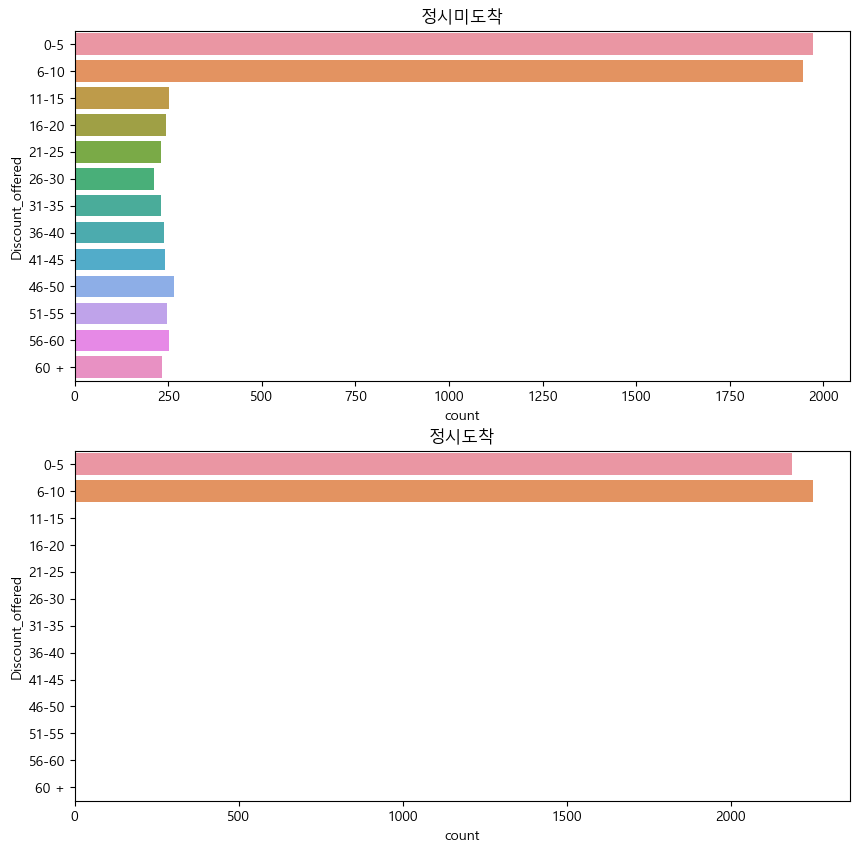

In [34]:
values = ['정시미도착', '정시도착']
axes = {}

fig = plt.figure(figsize=(10, 10))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 1, n+1)
    axes[f'ax{n+1}'] = sns.countplot(ontime_group.get_group(val), y='Discount_offered')
    axes[f'ax{n+1}'].set_title(f'{val}')

plt.show()

In [35]:
df[['Discount_offered']].describe()

,Discount_offered
count,10999.000000
mean,13.373216
std,16.205527
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,65.000000


In [36]:
ontime_ck_group = df.groupby('정시_도착_여부')
ontime_ck_group.get_group('정시도착')[['Discount_offered']].describe()

,Discount_offered
count,4436.000000
mean,5.545987
std,2.877727
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,10.000000


In [37]:
ontime_ck_group.get_group('정시미도착')[['Discount_offered']].describe()

,Discount_offered
count,6563.000000
mean,18.663721
std,19.108797
min,1.000000
25%,5.000000
50%,9.000000
75%,32.000000
max,65.000000


(-1.25, 1.25, -1.25, 1.25)

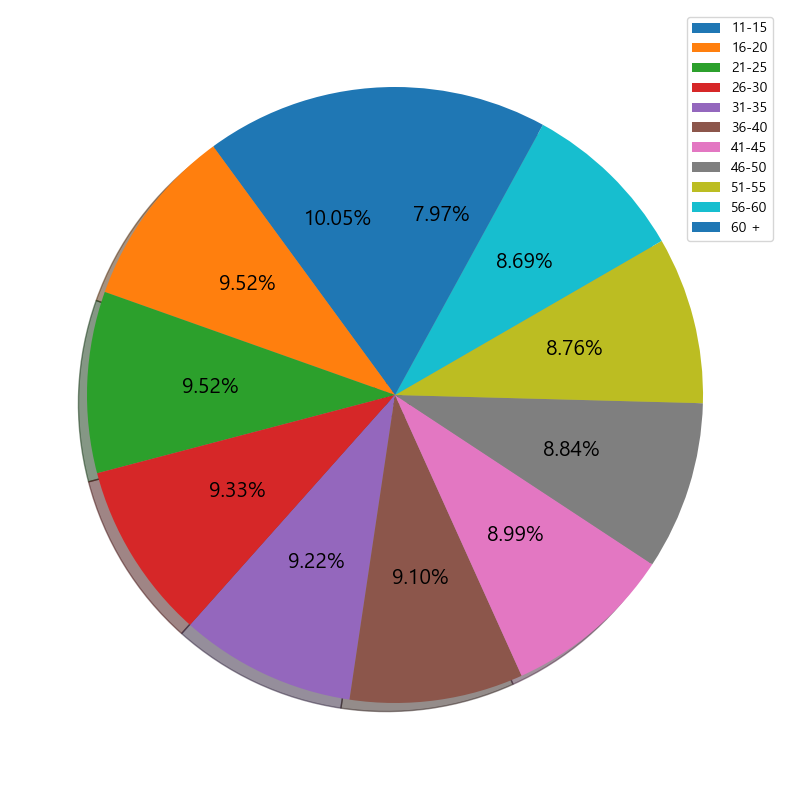

In [45]:
plt.figure(figsize=(10,10))

labels = ['11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', 
          '56-60', '60 +']

filtered_df_15 = df_15[df_15['Discount_offered'].isin(['11-15', '16-20', '21-25', '26-30', '31-35', '36-40', 
                                                       '41-45', '46-50', '51-55', '56-60', '60 +'])]

filtered_ontime = filtered_df_15.groupby('정시_도착_여부')

filtered_ontime.get_group('정시미도착')['Discount_offered'].sort_values().value_counts()[:11].plot.pie(
    autopct='%.2f%%', shadow=True, startangle=90, textprops={'size':15}, labels=None
)
plt.legend(labels)
plt.axis('off')

### 6) Weight in gms

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


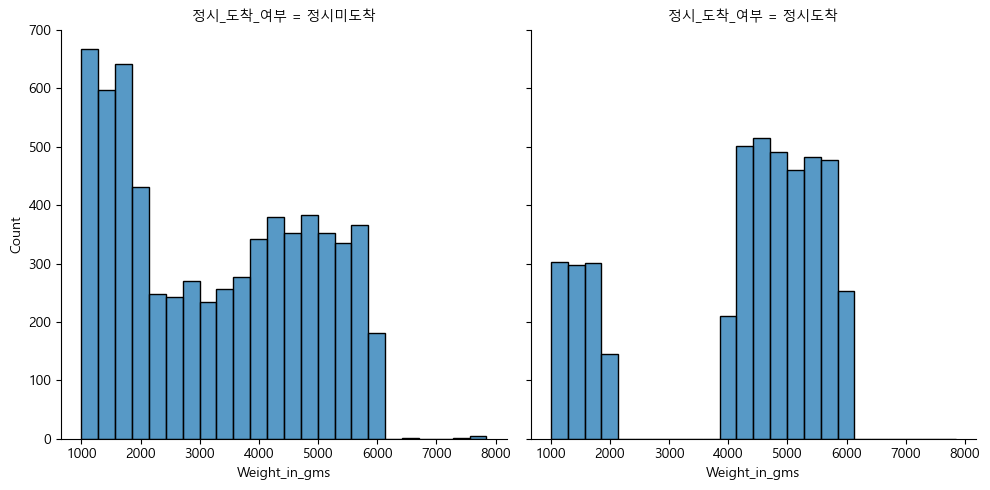

In [46]:
sns.displot(df, x='Weight_in_gms', col='정시_도착_여부')

In [47]:
bins = [0, 2000, 5000, 10000, 150000, 200000, float('inf')]
labels = ['극소형', '소형', '중형', '대형', '특대형', '+alpha']

df_std = df.copy()

df_std['Weight_in_gms'] = pd.cut(df_std['Weight_in_gms'], bins=bins, labels=labels, right=True)
df_std['Weight_in_gms'].value_counts()

Weight_in_gms
소형        4865
극소형       3245
중형        2889
대형           0
특대형          0
+alpha       0
Name: count, dtype: int64

In [48]:
ontime_group = df_std.groupby('정시_도착_여부')
ontime_group.groups

{'정시도착': [3136, 3137, 3138, 3139, 3141, 3144, 3145, 3146, 3147, 3148, 3150, 3151, 3153, 3154, 3158, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3170, 3173, 3174, 3178, 3179, 3180, 3182, 3184, 3186, 3187, 3188, 3189, 3191, 3192, 3193, 3195, 3197, 3198, 3199, 3200, 3201, 3202, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3215, 3216, 3220, 3223, 3224, 3225, 3228, 3230, 3232, 3234, 3238, 3245, 3248, 3251, 3254, 3255, 3257, 3258, 3263, 3265, 3267, 3270, 3271, 3272, 3274, 3279, 3280, 3282, 3283, 3284, 3286, 3287, 3288, 3290, 3292, 3293, 3294, 3300, 3301, 3303, 3304, 3305, 3306, 3307, 3308, 3309, ...], '정시미도착': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


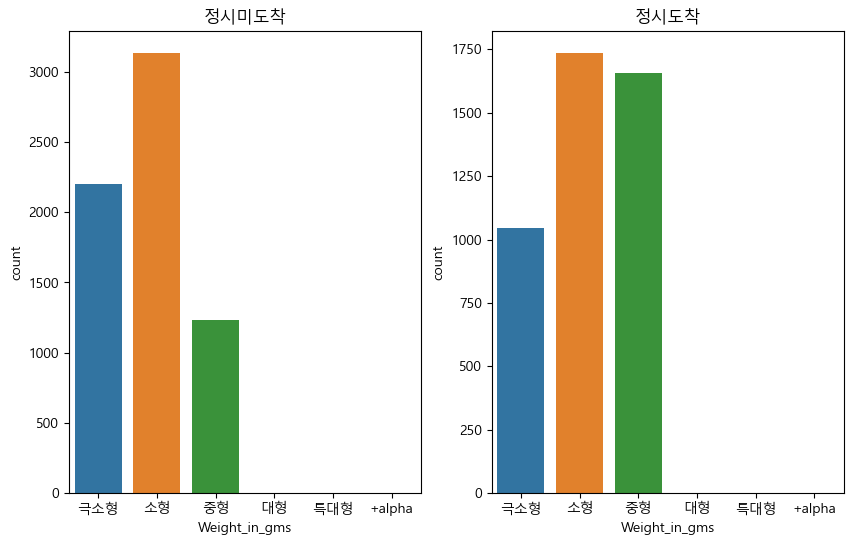

In [49]:
values = ['정시미도착', '정시도착']
axes = {}

fig = plt.figure(figsize=(10, 6))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(1, 2, n+1)
    axes[f'ax{n+1}'] = sns.countplot(ontime_group.get_group(val), x='Weight_in_gms')
    axes[f'ax{n+1}'].set_title(f'{val}')

plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


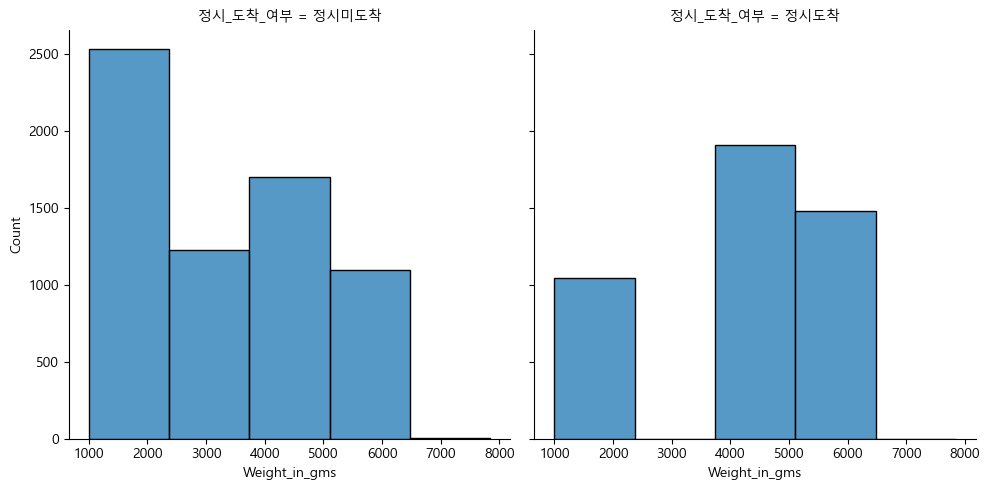

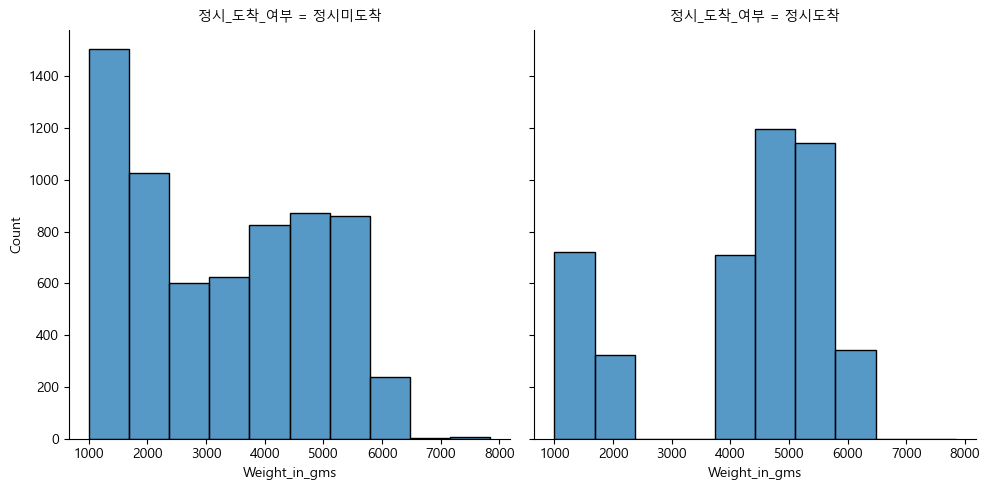

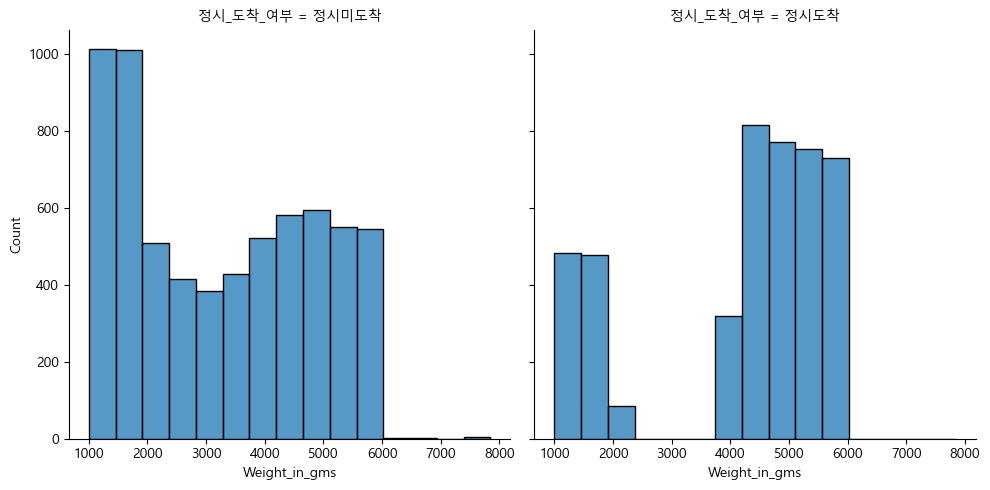

In [50]:
values = [5, 10, 15]

for n, val in enumerate(values):
    sns.displot(df, x='Weight_in_gms', col='정시_도착_여부', bins=val)

In [51]:
df[['Weight_in_gms']].describe()

,Weight_in_gms
count,10999.000000
mean,3634.016729
std,1635.377251
min,1001.000000
25%,1839.500000
50%,4149.000000
75%,5050.000000
max,7846.000000


In [52]:
bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, float('inf')]
labels = ['1.1-2.0', '2.1-3.0', '3.1-4.0', '4.1-5.0', '5.1-6.0', '6.1-7.0', '7.1 +']

df_std = df.copy()

df_std['Weight_in_gms'] = pd.cut(df_std['Weight_in_gms'], bins=bins, labels=labels, right=True)
df_std['Weight_in_gms'].value_counts()

Weight_in_gms
1.1-2.0    3245
4.1-5.0    3077
5.1-6.0    2881
2.1-3.0     899
3.1-4.0     889
7.1 +         5
6.1-7.0       3
Name: count, dtype: int64

In [53]:
ontime_group = df_std.groupby('정시_도착_여부')
ontime_group.groups

{'정시도착': [3136, 3137, 3138, 3139, 3141, 3144, 3145, 3146, 3147, 3148, 3150, 3151, 3153, 3154, 3158, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3170, 3173, 3174, 3178, 3179, 3180, 3182, 3184, 3186, 3187, 3188, 3189, 3191, 3192, 3193, 3195, 3197, 3198, 3199, 3200, 3201, 3202, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3215, 3216, 3220, 3223, 3224, 3225, 3228, 3230, 3232, 3234, 3238, 3245, 3248, 3251, 3254, 3255, 3257, 3258, 3263, 3265, 3267, 3270, 3271, 3272, 3274, 3279, 3280, 3282, 3283, 3284, 3286, 3287, 3288, 3290, 3292, 3293, 3294, 3300, 3301, 3303, 3304, 3305, 3306, 3307, 3308, 3309, ...], '정시미도착': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


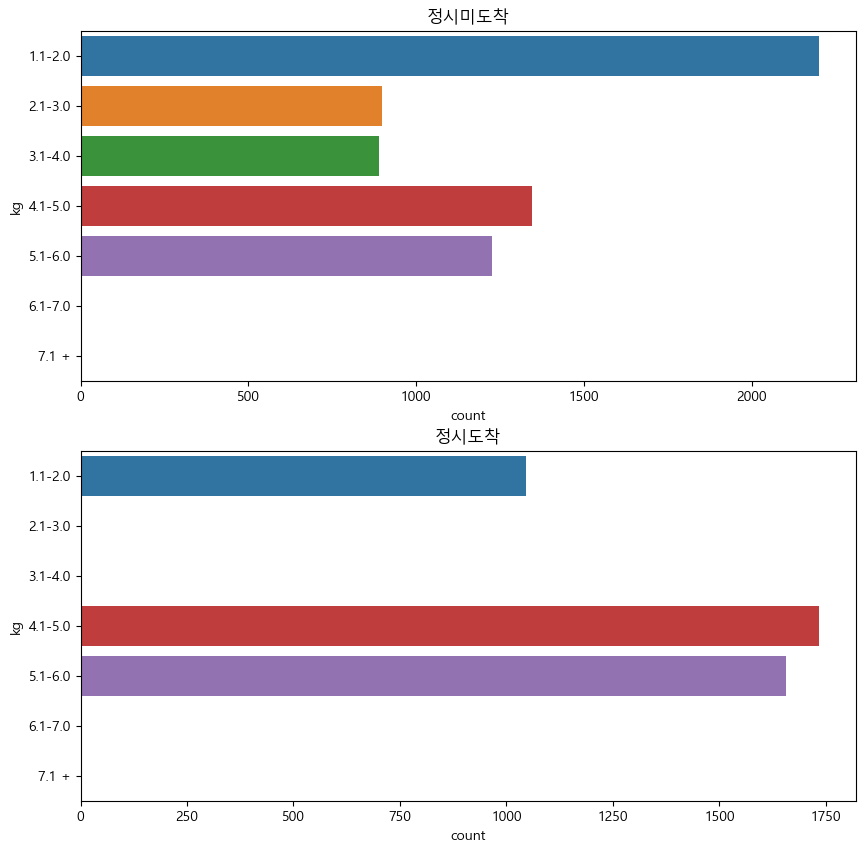

In [54]:
values = ['정시미도착', '정시도착']
axes = {}

fig = plt.figure(figsize=(10, 10))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 1, n+1)
    axes[f'ax{n+1}'] = sns.countplot(ontime_group.get_group(val), y='Weight_in_gms')
    axes[f'ax{n+1}'].set_title(f'{val}')
    axes[f'ax{n+1}'].set_ylabel('kg')

plt.show()

In [55]:
ontime_group.get_group('정시미도착')['Weight_in_gms'].value_counts(sort=False)

Weight_in_gms
1.1-2.0    2199
2.1-3.0     899
3.1-4.0     888
4.1-5.0    1344
5.1-6.0    1225
6.1-7.0       3
7.1 +         5
Name: count, dtype: int64

In [56]:
ontime_group.get_group('정시도착')['Weight_in_gms'].value_counts(sort=False)

Weight_in_gms
1.1-2.0    1046
2.1-3.0       0
3.1-4.0       1
4.1-5.0    1733
5.1-6.0    1656
6.1-7.0       0
7.1 +         0
Name: count, dtype: int64

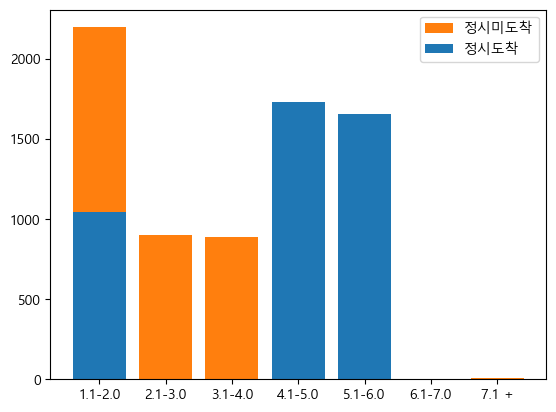

In [65]:
x = np.arange(len(labels))

plt.bar(x, ontime_group.get_group('정시미도착')['Weight_in_gms'].value_counts(sort=False), label='정시미도착', 
       color='#ff7f0e')
plt.bar(x, ontime_group.get_group('정시도착')['Weight_in_gms'].value_counts(sort=False), label='정시도착', 
       color='#1f77b4')

plt.xticks(x, labels)
plt.legend()

plt.show()

### 7. Prior purchases

In [66]:
prior_group = df.groupby('Prior_purchases')
prior_group.groups

{2: [2, 8, 11, 17, 21, 23, 25, 30, 31, 32, 41, 43, 44, 45, 48, 49, 65, 72, 77, 80, 81, 85, 87, 93, 97, 98, 100, 101, 111, 113, 115, 118, 124, 126, 131, 135, 138, 140, 146, 151, 154, 158, 159, 165, 176, 185, 187, 188, 222, 231, 233, 234, 264, 272, 273, 274, 280, 287, 289, 295, 296, 298, 302, 303, 304, 309, 311, 317, 319, 321, 324, 329, 338, 342, 343, 347, 348, 352, 354, 357, 358, 363, 371, 376, 377, 378, 381, 383, 384, 385, 386, 394, 395, 400, 402, 407, 412, 414, 415, 420, ...], 3: [1, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 24, 27, 28, 33, 34, 36, 46, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 66, 67, 68, 70, 73, 74, 76, 78, 79, 82, 83, 84, 86, 88, 89, 92, 94, 96, 103, 105, 106, 107, 108, 109, 110, 112, 114, 116, 119, 120, 121, 122, 123, 125, 127, 132, 133, 136, 141, 142, 143, 145, 147, 149, 150, 155, 160, 162, 164, 167, 168, 169, 170, 171, 173, 174, 175, 177, 178, 179, 182, 186, 189, 190, 191, 192, ...], 4: [3, 4, 22, 26, 29, 35, 37, 39, 42, 47, 69, 71, 90, 95, 99, 10

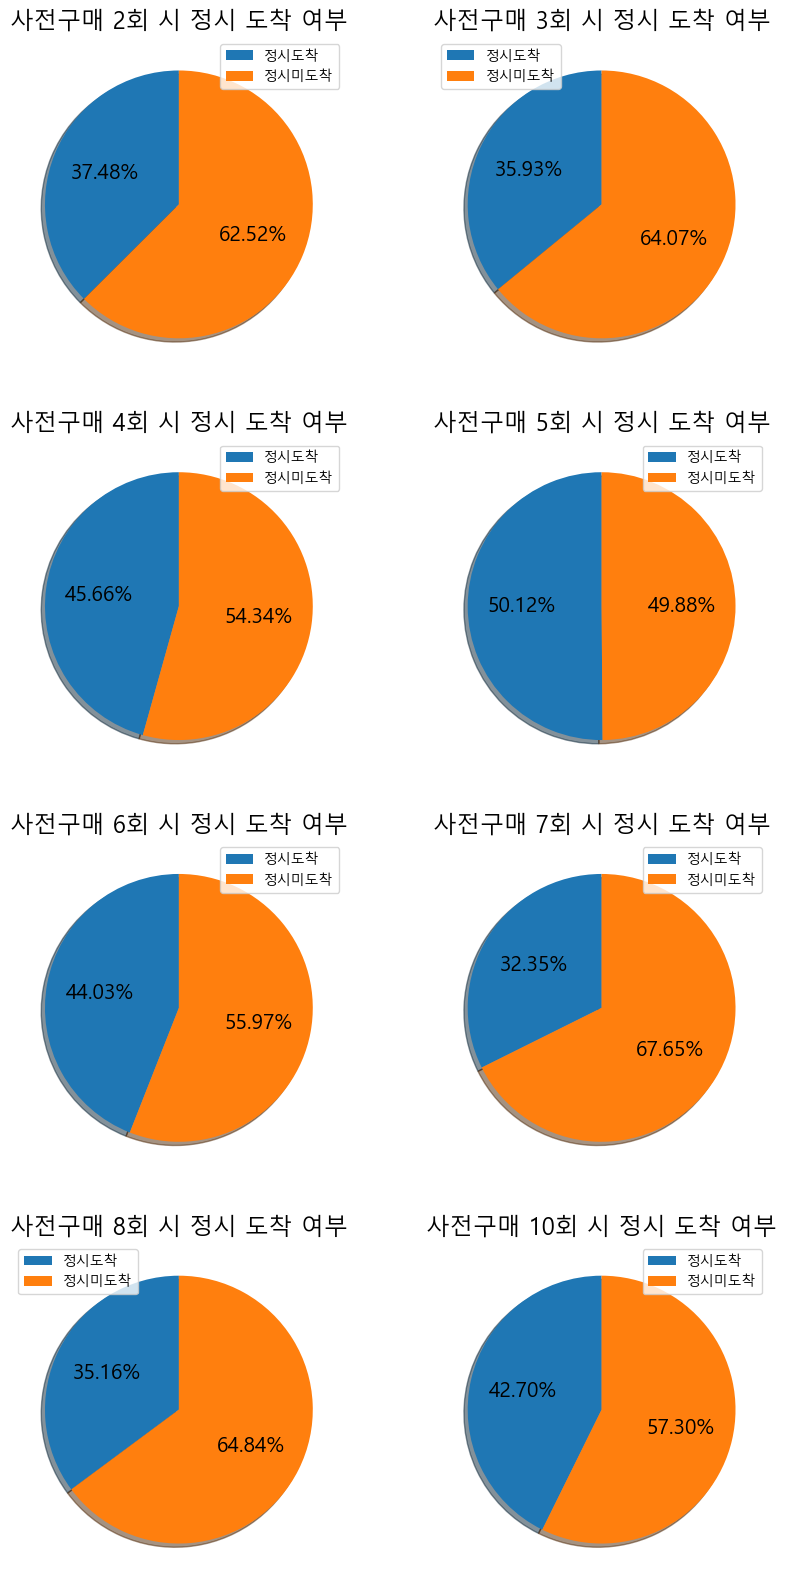

In [67]:
values = [2, 3, 4, 5, 6, 7, 8, 10]
axes = {}

fig = plt.figure(figsize=(10, 20))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(4, 2, n+1)
    axes[f'ax{n+1}'] = prior_group.get_group(val)['정시_도착_여부'].sort_values().value_counts(sort=False).plot.pie(
        autopct='%.2f%%', shadow=True, startangle=90, textprops={'size':15}, labels=None
    )
    axes[f'ax{n+1}'].set_title(f'사전구매 {val}회 시 정시 도착 여부', size=17)
    plt.axis('off')
    plt.legend(hue_order)

plt.show()

## 3. 가설 설정 및 증명

### 1. 이전 구매 횟수가 높을수록 중요도도 높고 일찍 도착한다.

In [68]:
ontime_group = df.groupby('정시_도착_여부')
N_df = ontime_group.get_group('정시미도착')
Y_df = ontime_group.get_group('정시도착')

In [69]:
N_importance_group = N_df.groupby('Product_importance')
Y_importance_group = Y_df.groupby('Product_importance')

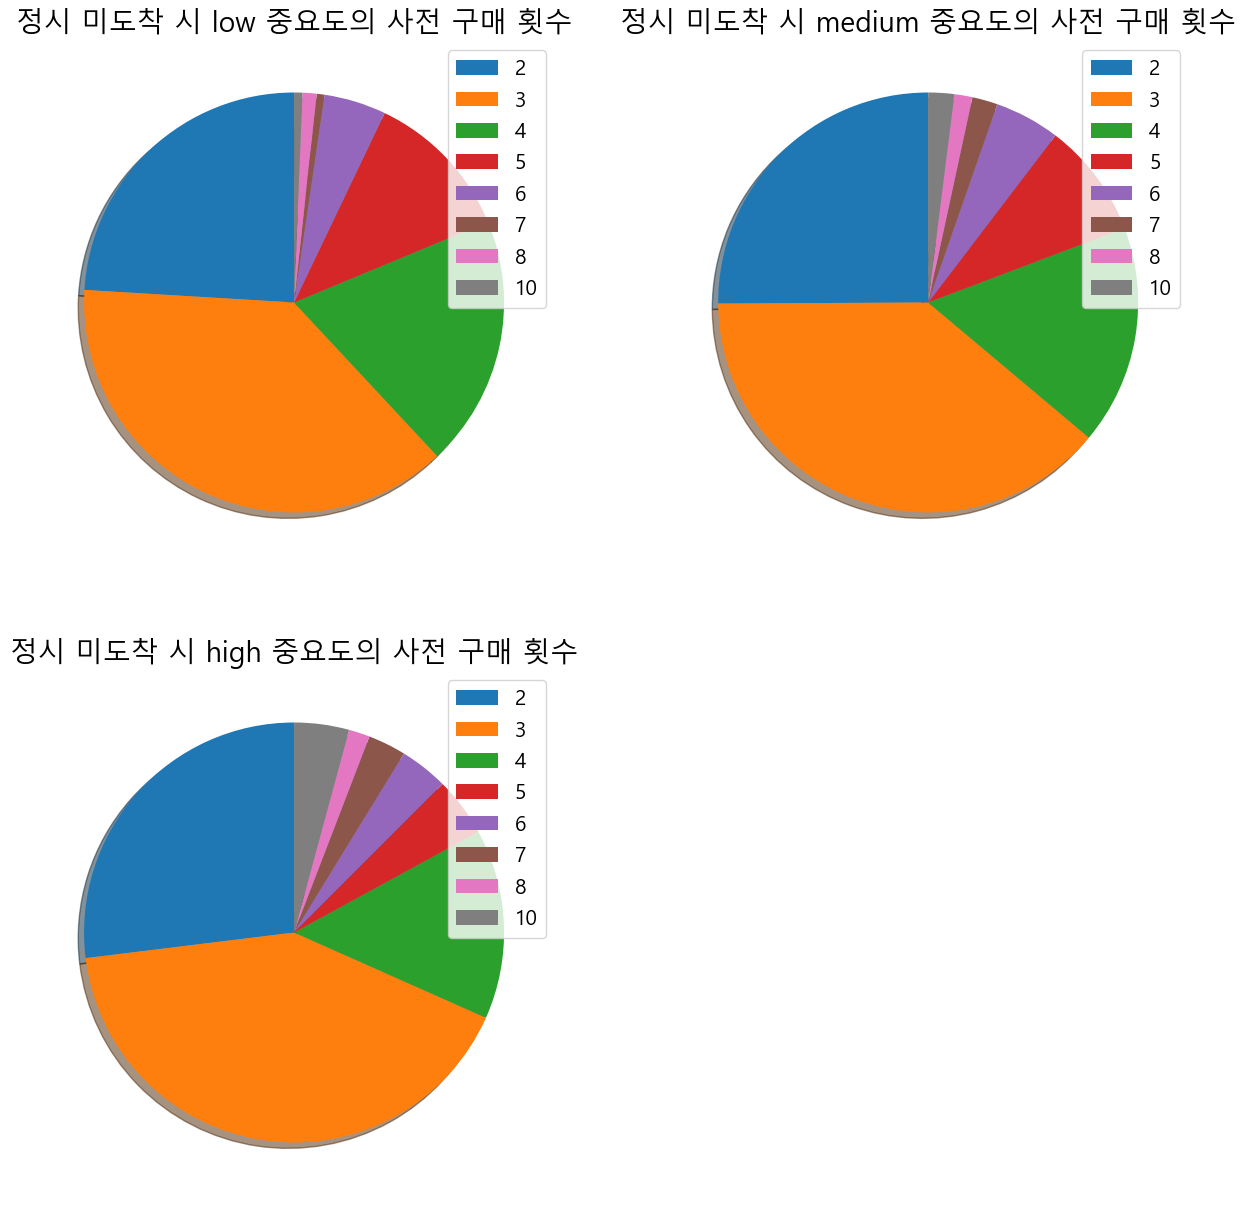

In [73]:
values = ['low', 'medium', 'high']
labels = [2, 3, 4, 5, 6, 7, 8, 10]
axes = {}

fig = plt.figure(figsize=(15, 15))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 2, n+1)
    axes[f'ax{n+1}'] = N_importance_group.get_group(val)['Prior_purchases'].sort_values().value_counts(sort=False).plot.pie(
        shadow=True, startangle=90, textprops={'size':15}, labels=None
    )
    axes[f'ax{n+1}'].set_title(f'정시 미도착 시 {val} 중요도의 사전 구매 횟수', size=20)
    plt.axis('off')
    plt.legend(labels, fontsize=15, loc='upper right')

plt.show()

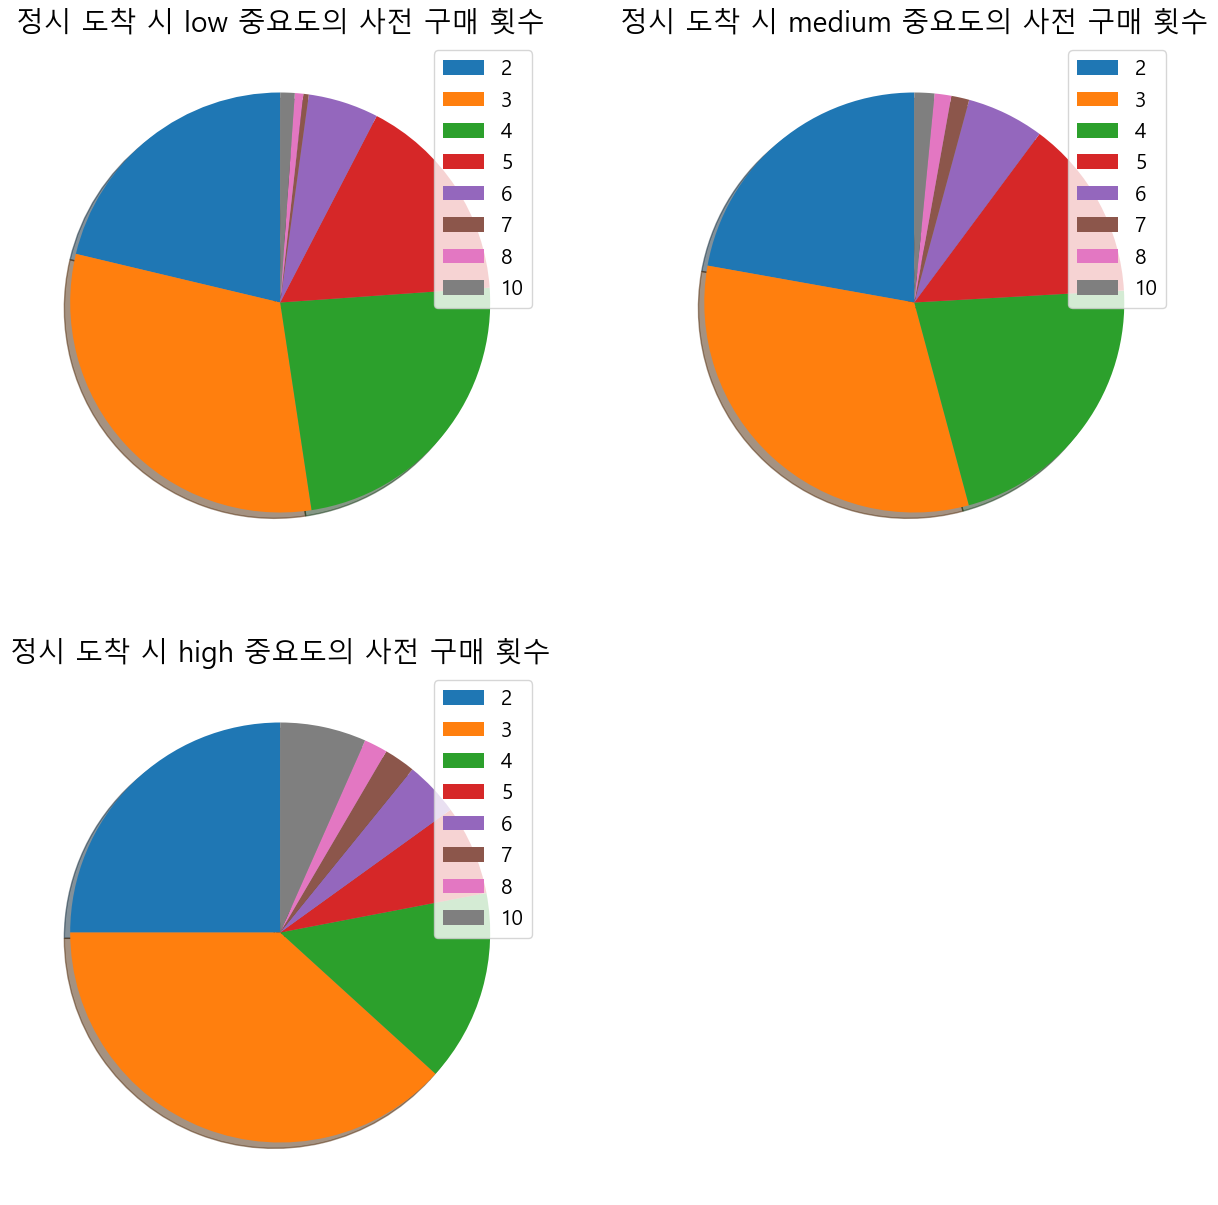

In [75]:
values = ['low', 'medium', 'high']
axes = {}

fig = plt.figure(figsize=(15, 15))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 2, n+1)
    axes[f'ax{n+1}'] = Y_importance_group.get_group(val)['Prior_purchases'].sort_values().value_counts(sort=False).plot.pie(
        shadow=True, startangle=90, textprops={'size':15}, labels=None
    )
    axes[f'ax{n+1}'].set_title(f'정시 도착 시 {val} 중요도의 사전 구매 횟수', size=20)
    plt.axis('off')
    plt.legend(labels, fontsize=15, loc='upper right')

plt.show()

### 2. 할인율이 높을수록 늦게 도착한다.

In [77]:
bins = [0, 5, 10, float('inf')]
labels = ['0-5', '6-10', '10+']

df_15 = df.copy()

df_15['Discount_offered'] = pd.cut(df_15['Discount_offered'], bins=bins, labels=labels, right=True)

ontime_group = df_15.groupby('정시_도착_여부')
ontime_group.groups

{'정시도착': [3136, 3137, 3138, 3139, 3141, 3144, 3145, 3146, 3147, 3148, 3150, 3151, 3153, 3154, 3158, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3170, 3173, 3174, 3178, 3179, 3180, 3182, 3184, 3186, 3187, 3188, 3189, 3191, 3192, 3193, 3195, 3197, 3198, 3199, 3200, 3201, 3202, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3215, 3216, 3220, 3223, 3224, 3225, 3228, 3230, 3232, 3234, 3238, 3245, 3248, 3251, 3254, 3255, 3257, 3258, 3263, 3265, 3267, 3270, 3271, 3272, 3274, 3279, 3280, 3282, 3283, 3284, 3286, 3287, 3288, 3290, 3292, 3293, 3294, 3300, 3301, 3303, 3304, 3305, 3306, 3307, 3308, 3309, ...], '정시미도착': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,

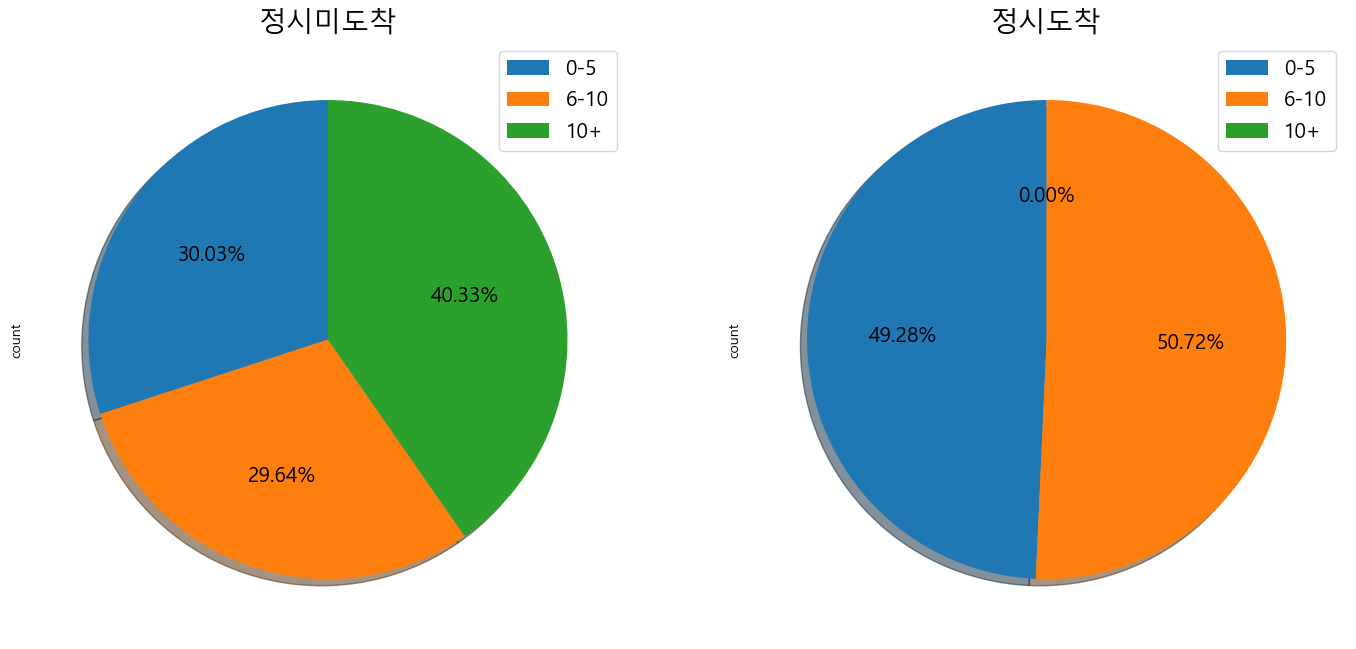

In [85]:
values = ['정시미도착', '정시도착']
axes = {}

fig = plt.figure(figsize=(17, 15))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(1, 2, n+1)
    axes[f'ax{n+1}'] = ontime_group.get_group(val)['Discount_offered'].sort_values().value_counts(sort=False).plot.pie(
        autopct='%.2f%%', shadow=True, startangle=90, textprops={'size':15}, labels=None

    )
    axes[f'ax{n+1}'].set_title(f'{val}', size=20)
    plt.legend(labels, fontsize=15, loc='upper right')

plt.show()

### 3. 할인율이 높을수록 중요도가 낮고 늦게 도착한다.

In [82]:
N_df = ontime_group.get_group('정시미도착')
Y_df = ontime_group.get_group('정시도착')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, '할인율에 따른 중요도')

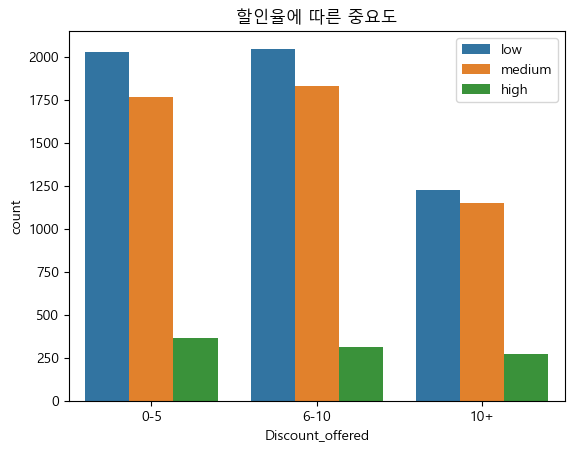

In [93]:
hue_order=['low', 'medium', 'high']
sns.countplot(data=df_15, x='Discount_offered', hue='Product_importance', hue_order=hue_order)
plt.legend(loc='upper right')
plt.title('할인율에 따른 중요도')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


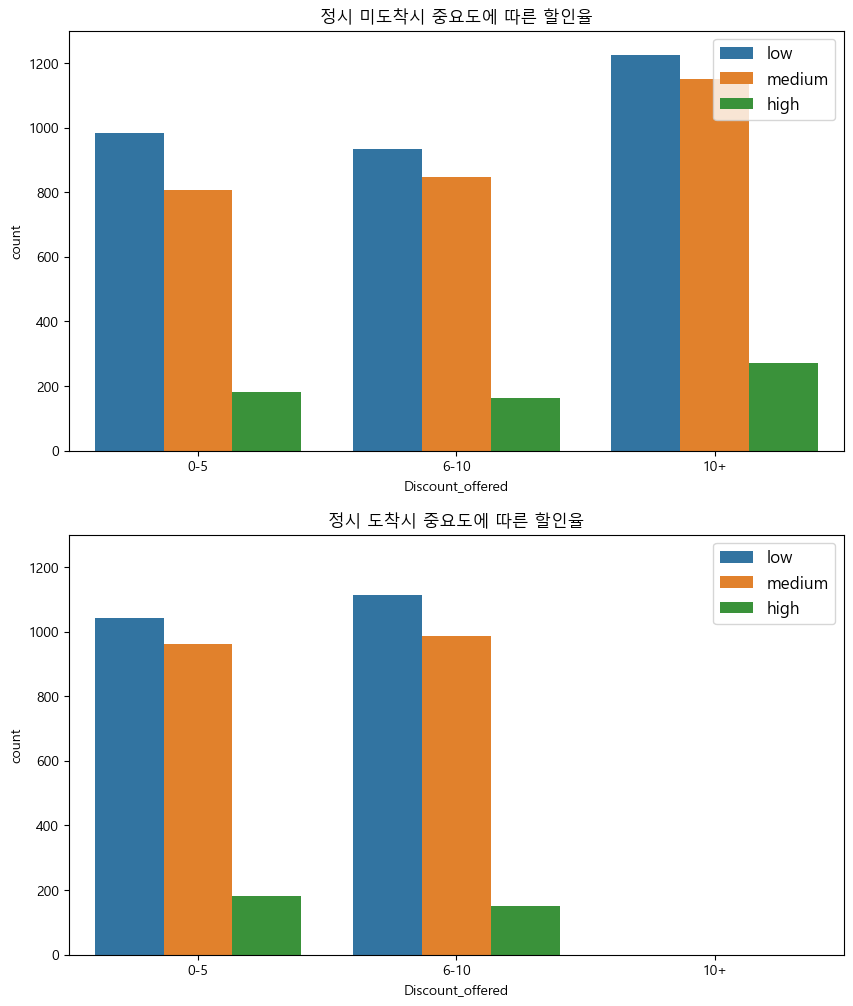

In [102]:
fig = plt.figure(figsize=(10, 12))

axes1 = fig.add_subplot(2, 1, 1)
axes1 = sns.countplot(data=N_df, x='Discount_offered', hue='Product_importance', hue_order=hue_order)
axes1.set_title('정시 미도착시 중요도에 따른 할인율')
axes1.legend(loc='upper right', fontsize=12)
axes1.set_ylim(0, 1300)

axes2 = fig.add_subplot(2, 1, 2)
axes2 = sns.countplot(data=Y_df, x='Discount_offered', hue='Product_importance', hue_order=hue_order)
axes2.set_title('정시 도착시 중요도에 따른 할인율')
axes2.legend(loc='upper right', fontsize=12)
axes2.set_ylim(0, 1300)

plt.show()

### 4. 가격이 높을수록 일찍 도착한다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


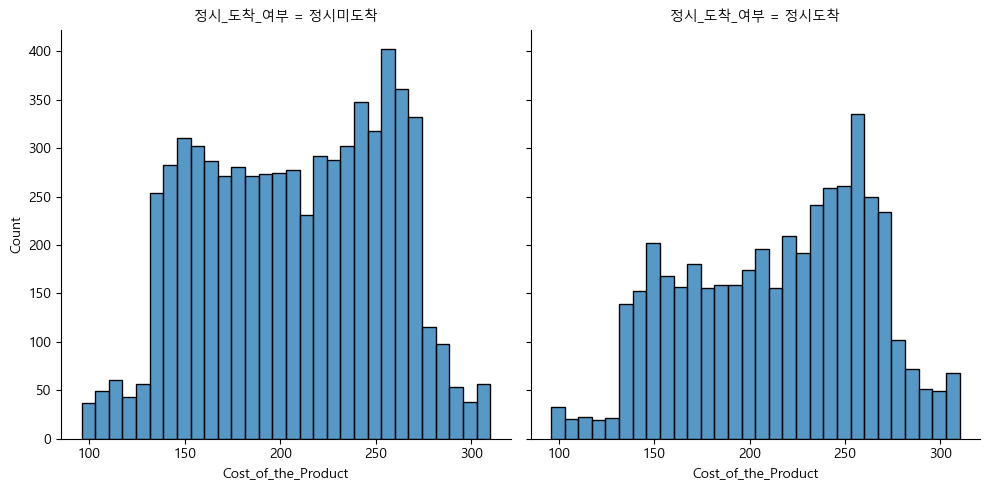

In [62]:
sns.displot(df, x='Cost_of_the_Product', col='정시_도착_여부')

In [63]:
df[['Cost_of_the_Product']].describe()

,Cost_of_the_Product
count,10999.000000
mean,210.196836
std,48.063272
min,96.000000
25%,169.000000
50%,214.000000
75%,251.000000
max,310.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

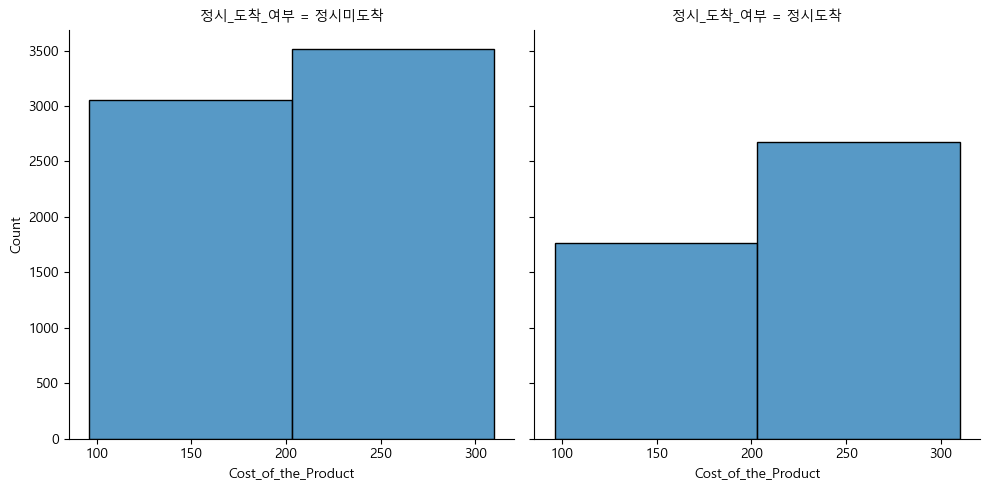

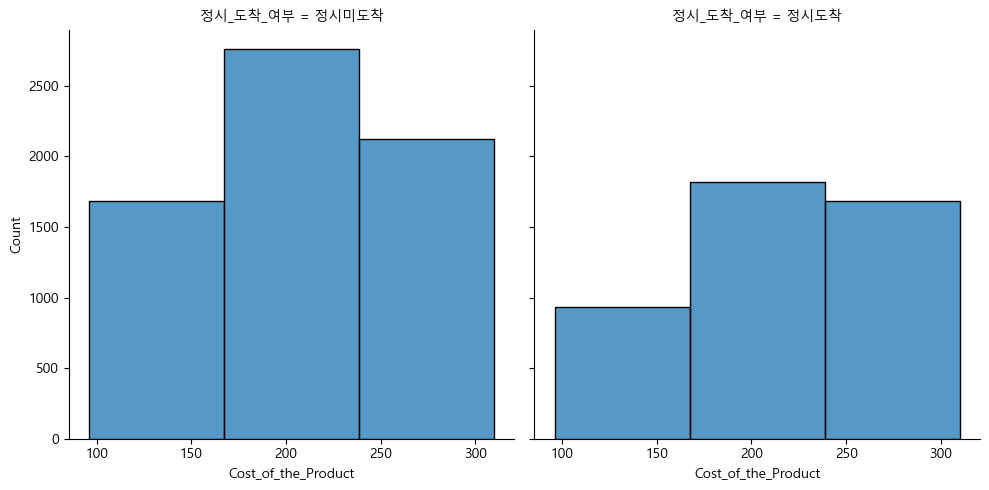

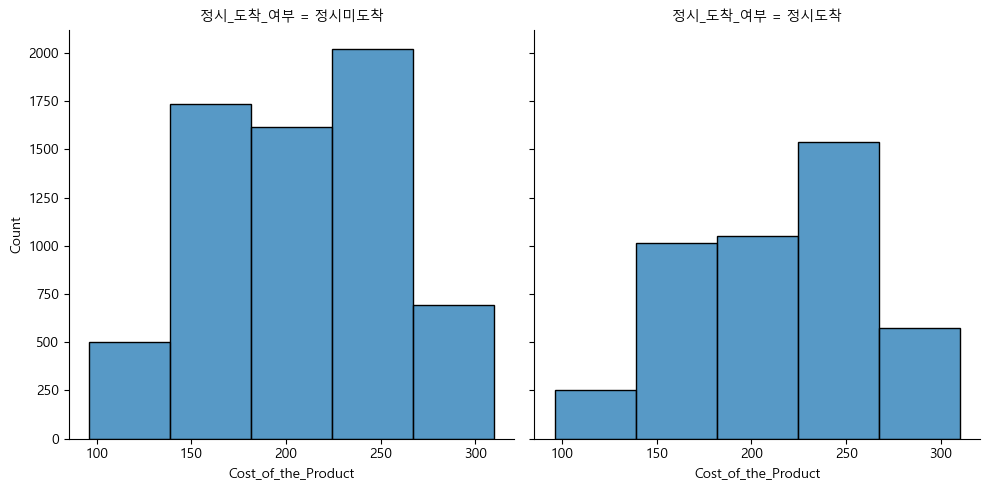

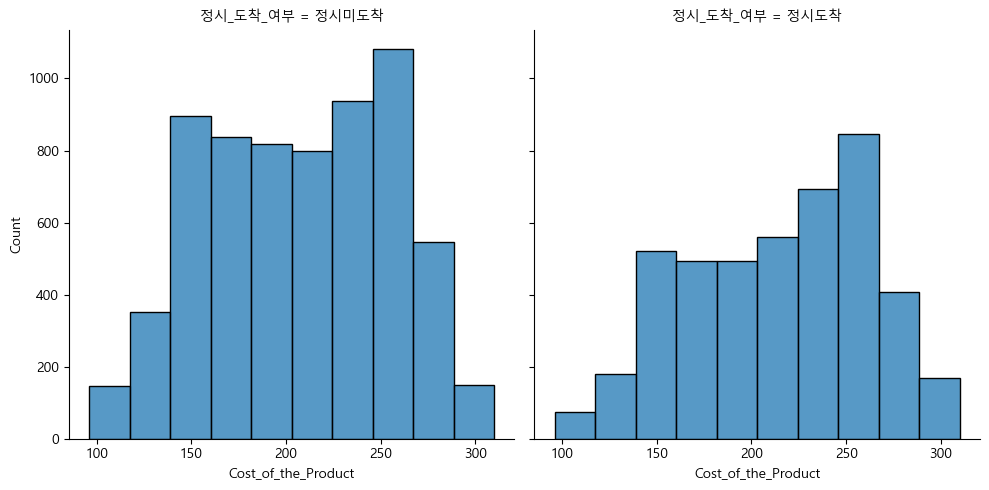

In [64]:
values = [2, 3, 5, 10]

for n, val in enumerate(values):
    sns.displot(df, x='Cost_of_the_Product', col='정시_도착_여부', bins=val)

In [94]:
bins = [50, 100, 150, 200, 250, 300, float('inf')]
labels = ['50-100', '101-150', '151-200', '201-250', '251-300', '300+']

df_cost = df.copy()

df_cost['Cost_of_the_Product'] = pd.cut(df_cost['Cost_of_the_Product'], bins=bins, labels=labels, right=True)
df_cost['Cost_of_the_Product'].value_counts()

Cost_of_the_Product
201-250    3560
151-200    3156
251-300    2624
101-150    1465
300+        154
50-100       40
Name: count, dtype: int64

In [95]:
ontime_group = df_cost.groupby('정시_도착_여부')
ontime_group.groups

{'정시도착': [3136, 3137, 3138, 3139, 3141, 3144, 3145, 3146, 3147, 3148, 3150, 3151, 3153, 3154, 3158, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3170, 3173, 3174, 3178, 3179, 3180, 3182, 3184, 3186, 3187, 3188, 3189, 3191, 3192, 3193, 3195, 3197, 3198, 3199, 3200, 3201, 3202, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3215, 3216, 3220, 3223, 3224, 3225, 3228, 3230, 3232, 3234, 3238, 3245, 3248, 3251, 3254, 3255, 3257, 3258, 3263, 3265, 3267, 3270, 3271, 3272, 3274, 3279, 3280, 3282, 3283, 3284, 3286, 3287, 3288, 3290, 3292, 3293, 3294, 3300, 3301, 3303, 3304, 3305, 3306, 3307, 3308, 3309, ...], '정시미도착': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


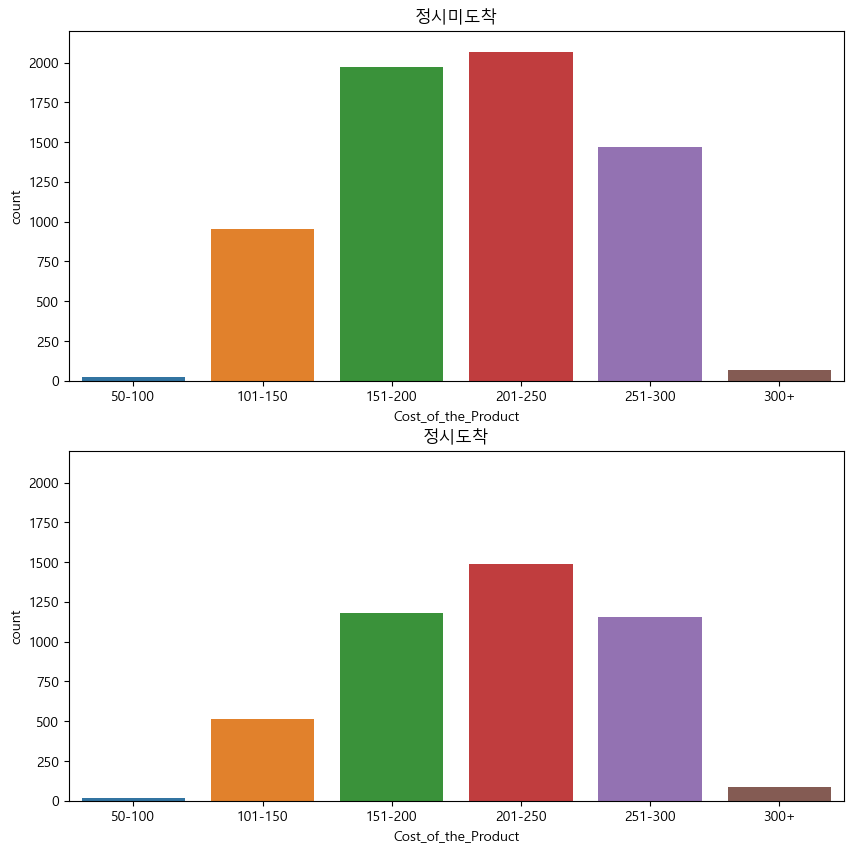

In [98]:
values = ['정시미도착', '정시도착']
axes = {}

fig = plt.figure(figsize=(10, 10))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 1, n+1)
    axes[f'ax{n+1}'] = sns.countplot(ontime_group.get_group(val), x='Cost_of_the_Product')
    axes[f'ax{n+1}'].set_title(f'{val}')
    axes[f'ax{n+1}'].set_ylim(0, 2200)

plt.show()

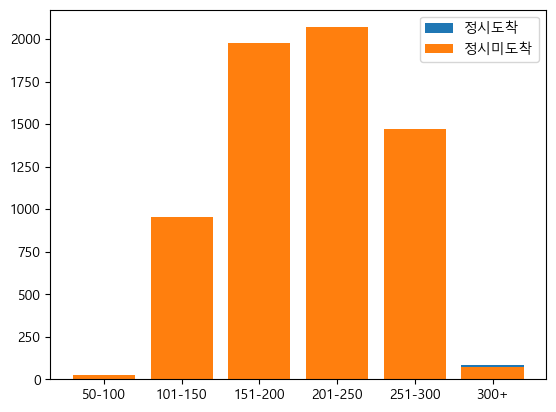

In [68]:
x = np.arange(len(labels))

plt.bar(x, ontime_group.get_group('정시도착')['Cost_of_the_Product'].value_counts(sort=False), label='정시도착')
plt.bar(x, ontime_group.get_group('정시미도착')['Cost_of_the_Product'].value_counts(sort=False), label='정시미도착')

plt.xticks(x, labels)
plt.legend()

plt.show()

### 5. 가격이 높을수록 중요도가 높고 일찍 도착한다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


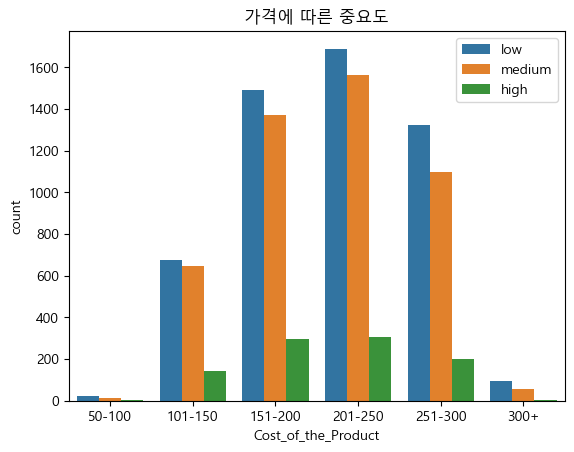

In [104]:
hue_order=['low', 'medium', 'high']
sns.countplot(data=df_cost, x='Cost_of_the_Product', hue='Product_importance', hue_order=hue_order)
plt.title('가격에 따른 중요도')
plt.legend(loc='upper right')

In [109]:
ontime_group = df_cost.groupby('정시_도착_여부')
N_df = ontime_group.get_group('정시미도착')
Y_df = ontime_group.get_group('정시도착')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


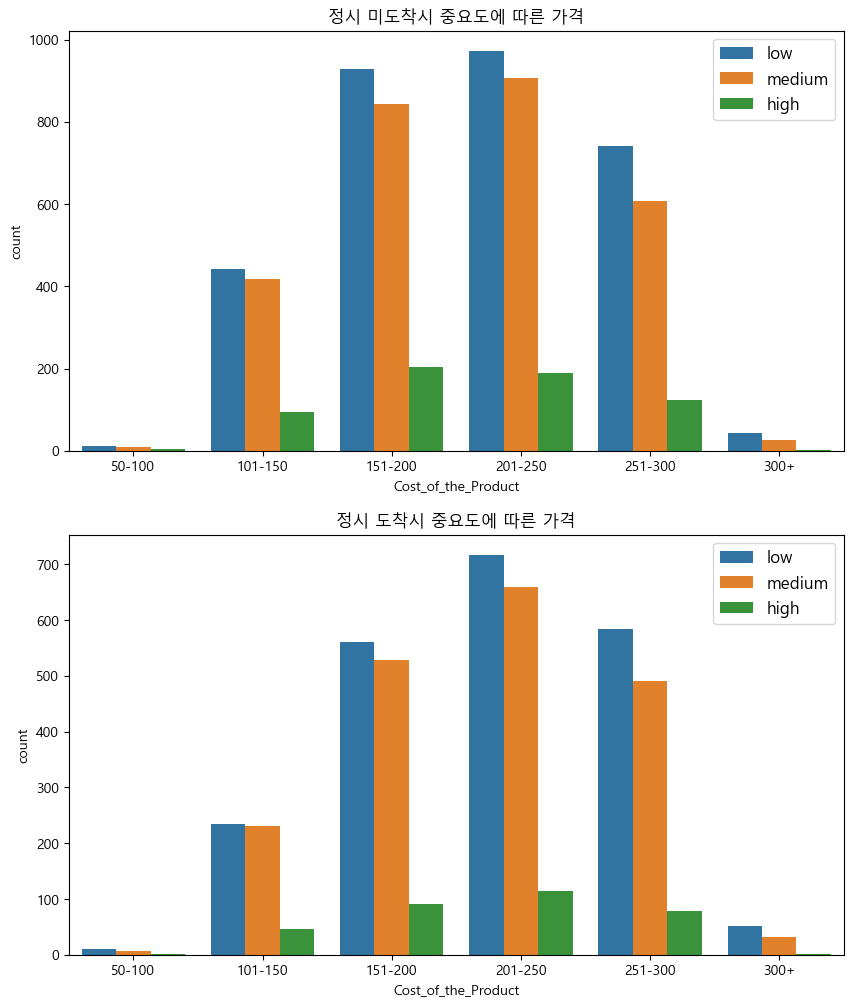

In [110]:
fig = plt.figure(figsize=(10, 12))

axes1 = fig.add_subplot(2, 1, 1)
axes1 = sns.countplot(data=N_df, x='Cost_of_the_Product', hue='Product_importance', hue_order=hue_order)
axes1.set_title('정시 미도착시 중요도에 따른 가격')
axes1.legend(loc='upper right', fontsize=12)

axes2 = fig.add_subplot(2, 1, 2)
axes2 = sns.countplot(data=Y_df, x='Cost_of_the_Product', hue='Product_importance', hue_order=hue_order)
axes2.set_title('정시 도착시 중요도에 따른 가격')
axes2.legend(loc='upper right', fontsize=12)

plt.show()

### 6. 가격이 높을수록 상대적으로 할인율이 높고, 늦게 도착한다.

In [112]:
bins = [0, 5, 10, float('inf')]
labels = ['0-5', '6-10', '10+']

df_cost_15 = df_cost.copy()

df_cost_15['Discount_offered'] = pd.cut(df_cost_15['Discount_offered'], bins=bins, labels=labels, right=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '가격에 따른 할인율')

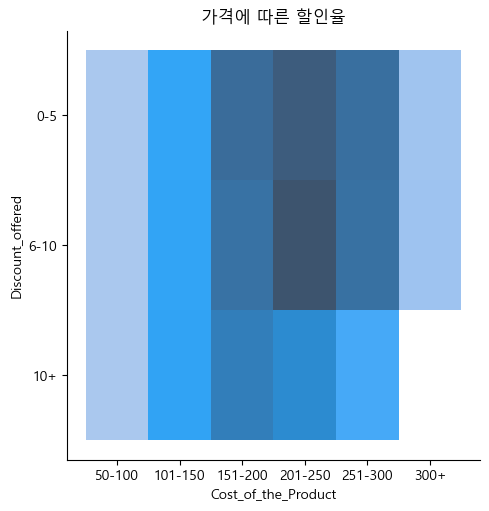

In [113]:
sns.displot(df_cost_15, x='Cost_of_the_Product', y='Discount_offered')
plt.title('가격에 따른 할인율')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '정시 도착 여부 기준 가격에 따른 할인율')

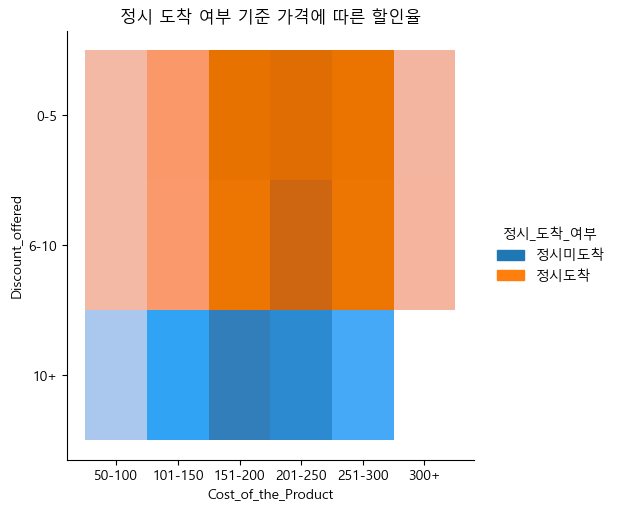

In [114]:
sns.displot(df_cost_15, x='Cost_of_the_Product', y='Discount_offered', hue='정시_도착_여부')
plt.title('정시 도착 여부 기준 가격에 따른 할인율')

In [75]:
ontime_group = df_cost_15.groupby('정시_도착_여부')
N_df = ontime_group.get_group('정시미도착')
Y_df = ontime_group.get_group('정시도착')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


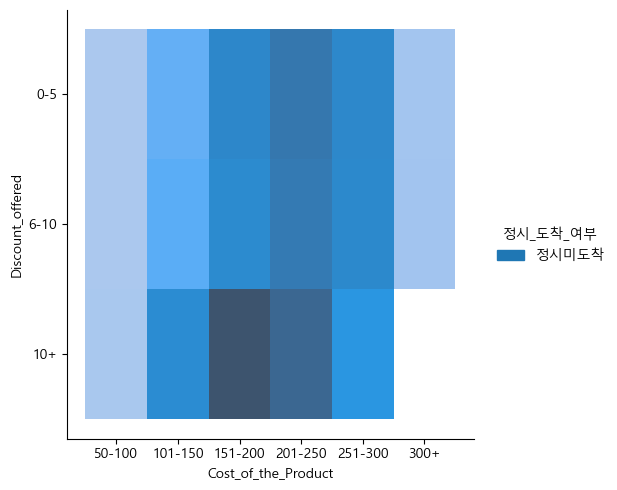

In [76]:
sns.displot(N_df, x='Cost_of_the_Product', y='Discount_offered', hue='정시_도착_여부')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


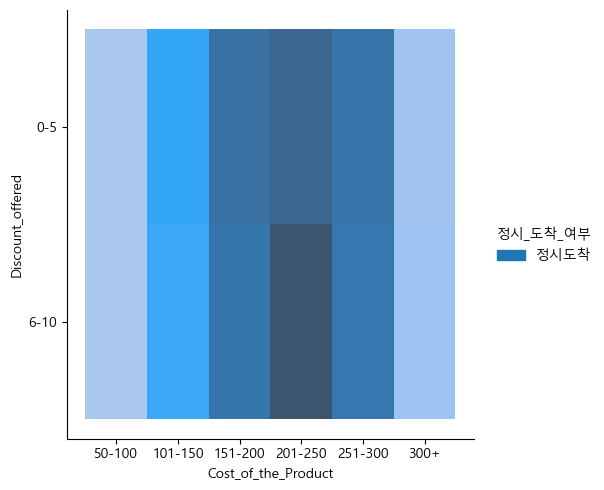

In [77]:
sns.displot(Y_df, x='Cost_of_the_Product', y='Discount_offered', hue='정시_도착_여부')

### 7. 고객 문의 전화가 많을수록 늦게 도착한다.

In [78]:
## 이미 있음

### 8. 고객의 문의 전화가 많을수록 중요도가 높고 일찍 도착한다.


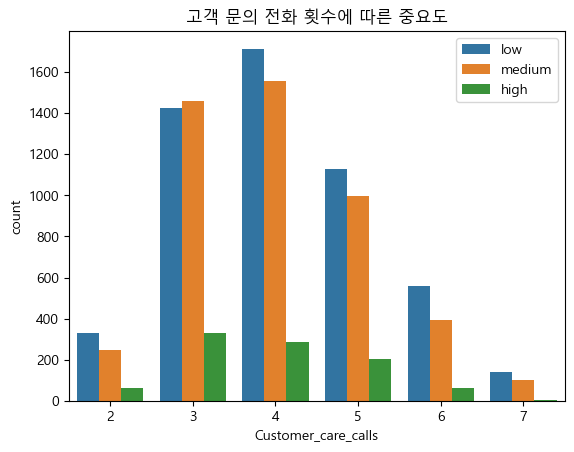

In [119]:
hue_order=['low', 'medium', 'high']
sns.countplot(data= df, x='Customer_care_calls', hue='Product_importance', hue_order=hue_order)
plt.title('고객 문의 전화 횟수에 따른 중요도')
plt.legend(loc='upper right')

In [121]:
ontime_group = df.groupby('정시_도착_여부')
N_df = ontime_group.get_group('정시미도착')
Y_df = ontime_group.get_group('정시도착')

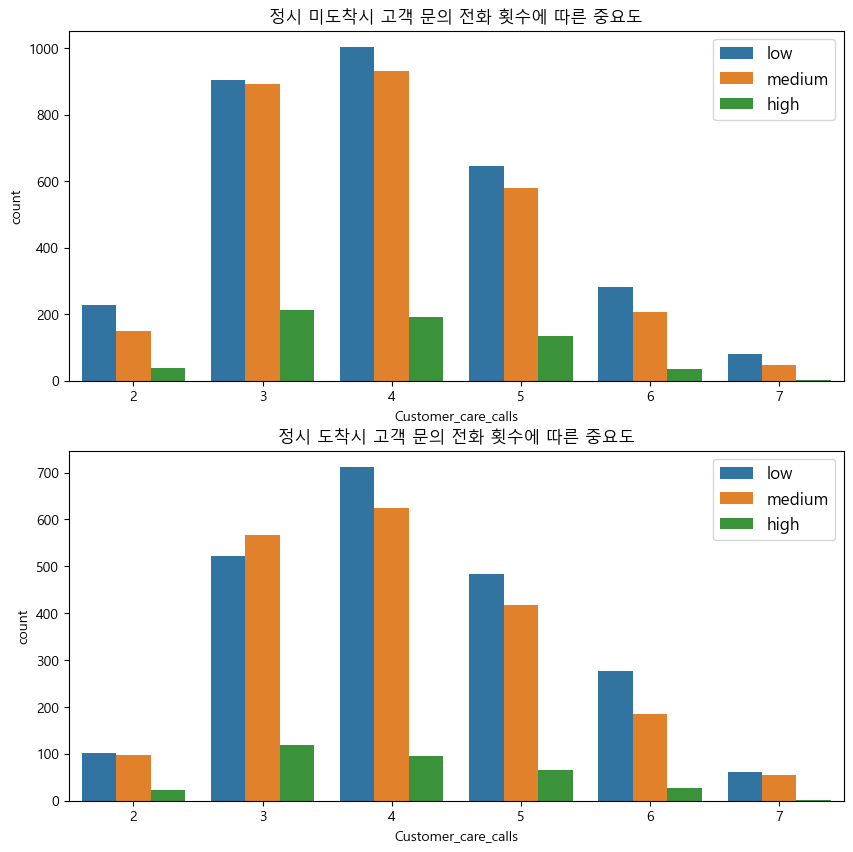

In [122]:
fig = plt.figure(figsize=(10, 10))

axes1 = fig.add_subplot(2, 1, 1)
axes1 = sns.countplot(data=N_df, x='Customer_care_calls', hue='Product_importance', hue_order=hue_order)
axes1.set_title('정시 미도착시 고객 문의 전화 횟수에 따른 중요도')
axes1.legend(loc='upper right', fontsize=12)

axes2 = fig.add_subplot(2, 1, 2)
axes2 = sns.countplot(data=Y_df, x='Customer_care_calls', hue='Product_importance', hue_order=hue_order)
axes2.set_title('정시 도착시 고객 문의 전화 횟수에 따른 중요도')
axes2.legend(loc='upper right', fontsize=12)

plt.show()

### 9. 가격이 비쌀수록 문의 전화가 많고 일찍 도착한다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '가격에 따른 문의 전화 횟수')

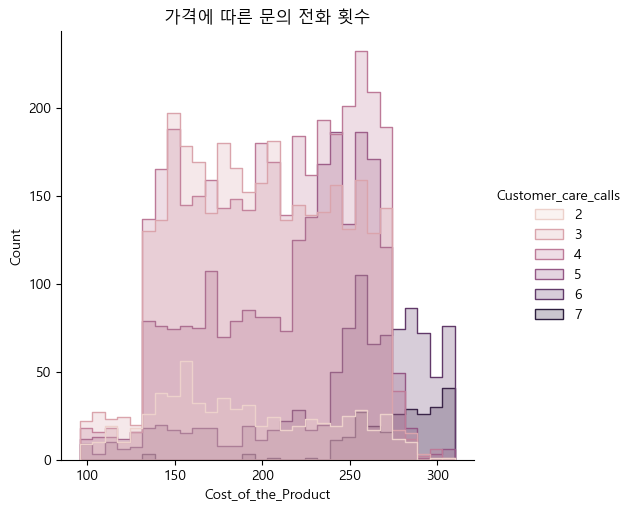

In [125]:
sns.displot(df, x='Cost_of_the_Product', hue='Customer_care_calls', element='step')
plt.title('가격에 따른 문의 전화 횟수')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


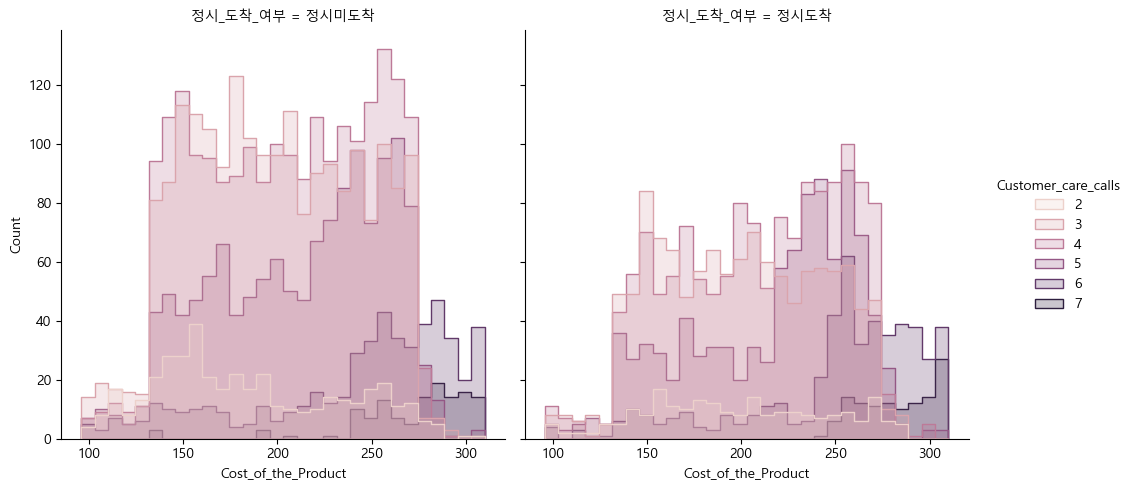

In [128]:
sns.displot(df, x='Cost_of_the_Product', hue='Customer_care_calls', element='step', col='정시_도착_여부')

### 10. 무게가 무거울수록 늦게 도착한다.

In [138]:
bins = [1000, 2000, 3000, 4000, 5000, 6000, float('inf')]
labels = ['1.1-2.0', '2.1-3.0', '3.1-4.0', '4.1-5.0', '5.1-6.0', '6.1 +']

df_std = df.copy()

df_std['Weight_in_gms'] = pd.cut(df_std['Weight_in_gms'], bins=bins, labels=labels, right=True)
df_std['Weight_in_gms'].value_counts()

Weight_in_gms
1.1-2.0    3245
4.1-5.0    3077
5.1-6.0    2881
2.1-3.0     899
3.1-4.0     889
6.1 +         8
Name: count, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


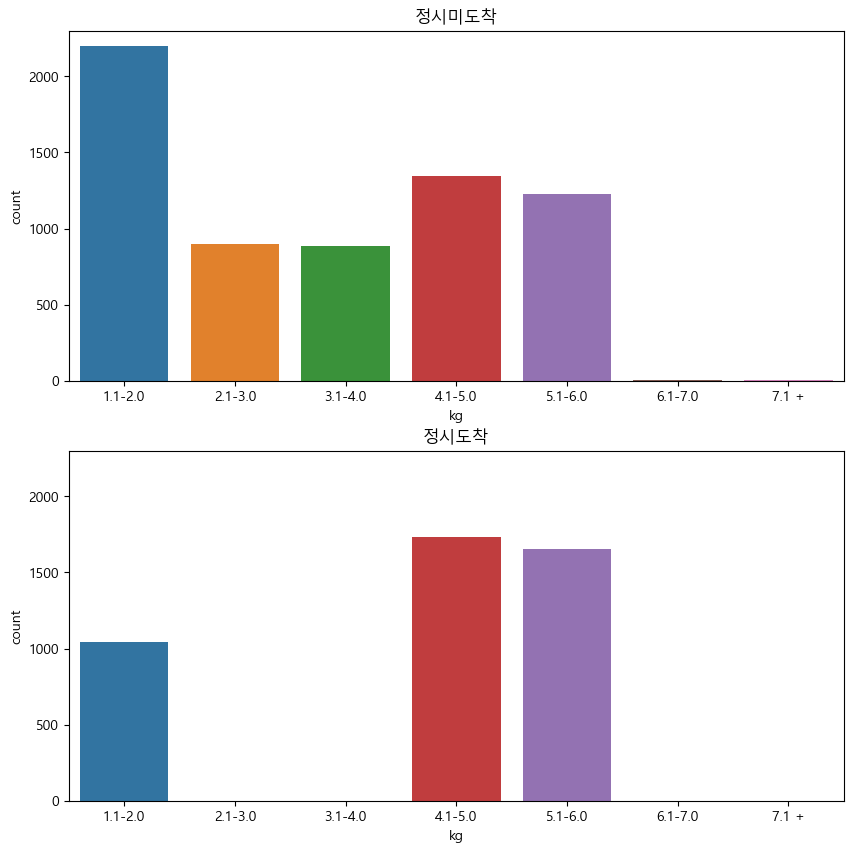

In [130]:
ontime_group = df_std.groupby('정시_도착_여부')
ontime_group.groups

values = ['정시미도착', '정시도착']
axes = {}

fig = plt.figure(figsize=(10, 10))

for n, val in enumerate(values):
    axes[f'ax{n+1}'] = fig.add_subplot(2, 1, n+1)
    axes[f'ax{n+1}'] = sns.countplot(ontime_group.get_group(val), x='Weight_in_gms')
    axes[f'ax{n+1}'].set_title(f'{val}')
    axes[f'ax{n+1}'].set_xlabel('kg')
    axes[f'ax{n+1}'].set_ylim(0, 2300)

plt.show()

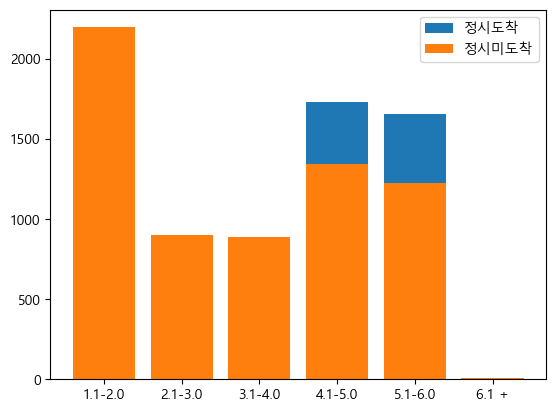

In [102]:
ontime_group.get_group('정시미도착')['Weight_in_gms'].value_counts(sort=False)
ontime_group.get_group('정시도착')['Weight_in_gms'].value_counts(sort=False)

x = np.arange(len(labels))

plt.bar(x, ontime_group.get_group('정시도착')['Weight_in_gms'].value_counts(sort=False), label='정시도착')
plt.bar(x, ontime_group.get_group('정시미도착')['Weight_in_gms'].value_counts(sort=False), label='정시미도착')

plt.xticks(x, labels)
plt.legend()

plt.show()

### 11. 무게가 무거울수록 비싸고 일찍 도착한다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


Text(0.5, 1.0, '가격에 따른 무게')

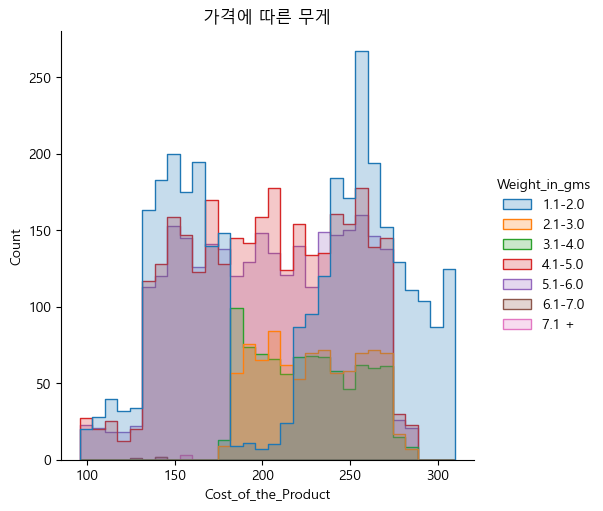

In [136]:
sns.displot(df_std, x='Cost_of_the_Product', hue='Weight_in_gms', element='step')
plt.title('가격에 따른 무게')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


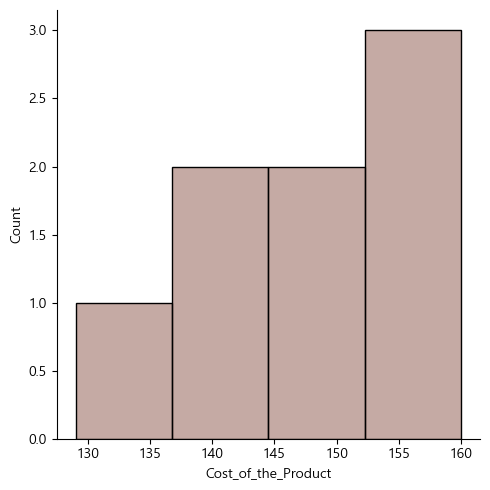

In [140]:
mask = df_std['Weight_in_gms'] == '6.1 +'
sns.displot(df_std[mask], x='Cost_of_the_Product', hue='Weight_in_gms', legend=False)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


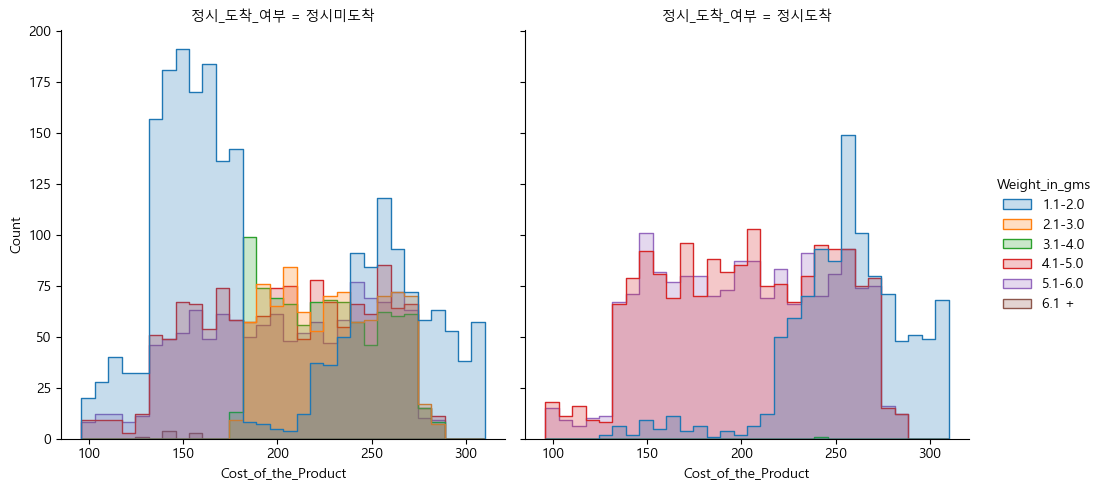

In [101]:
sns.displot(df_std, x='Cost_of_the_Product', hue='Weight_in_gms', element='step', col='정시_도착_여부')